# **Coupon Recommendation Machine Learning**

## **Import Python Packages and Libraries**

In [1]:
!pip install matplotlib # for plots
!pip install graphviz # for decision trees and other graphics
!pip install category_encoders # for ordinal encoding

     |████████████████████████████████| 80 kB 3.4 MB/s 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import category_encoders as ce
import time
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import tree # for decision trees
from sklearn.ensemble import RandomForestClassifier # for random forest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Load Data**

In [3]:
# Import from local drive. Change local drive as required
#originaldf = pd.read_csv('/home/jovyan/in-vehicle-coupon-recommendation.csv',delimiter = ',')

# Import from website
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv'
originaldf = pd.read_csv(url)

## **Explore Data**

In [4]:
# See first five records
originaldf.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
# Check datatypes
originaldf.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [6]:
# Check how many null values in each attribute
originaldf.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

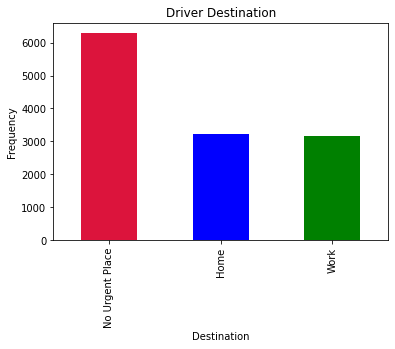

In [7]:
# Distribution of driver destination
plt.title('Driver Destination')
plt.xlabel('Destination')
plt.ylabel('Frequency')
originaldf['destination'].value_counts().plot(kind='bar', color=['crimson','blue','green','cyan'])
originaldf['destination'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

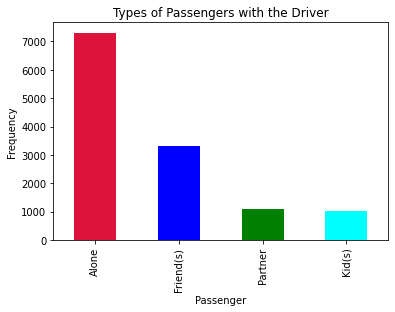

In [8]:
# Distribution of passenger
plt.title('Types of Passengers with the Driver')
plt.xlabel('Passenger')
plt.ylabel('Frequency')
originaldf['passanger'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan'])
originaldf['passanger'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

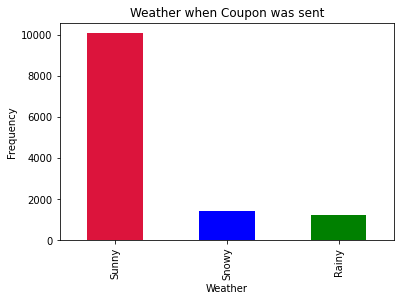

In [9]:
# Distribution of weather
plt.title('Weather when Coupon was sent')
plt.xlabel('Weather')
plt.ylabel('Frequency')
originaldf['weather'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan'])
originaldf['weather'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

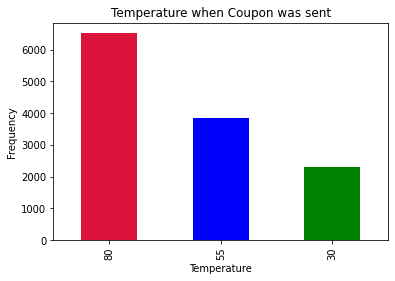

In [10]:
# Distribution of temperature
plt.title('Temperature when Coupon was sent')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
originaldf['temperature'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan'])
originaldf['temperature'].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

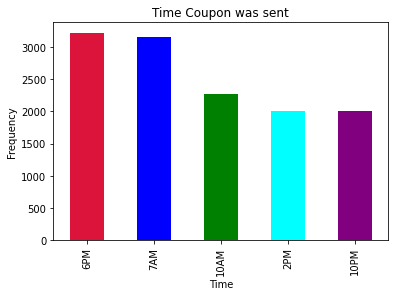

In [11]:
# Distribution of time
plt.title('Time Coupon was sent')
plt.xlabel('Time')
plt.ylabel('Frequency')
originaldf['time'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['time'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

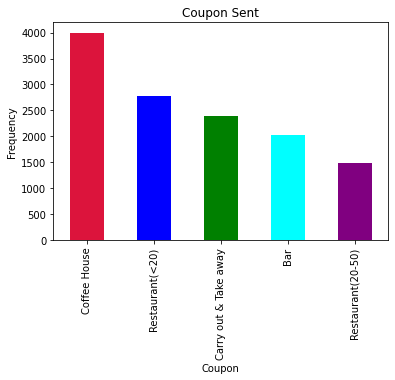

In [12]:
# Distribution of coupon
plt.title('Coupon Sent')
plt.xlabel('Coupon')
plt.ylabel('Frequency')
originaldf['coupon'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['coupon'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

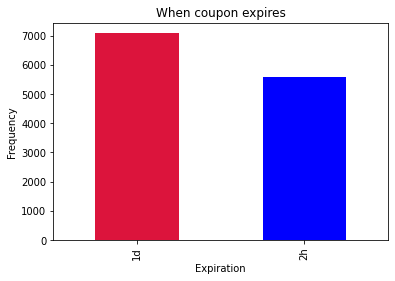

In [13]:
# Distribution of expiration
plt.title('When coupon expires')
plt.xlabel('Expiration')
plt.ylabel('Frequency')
originaldf['expiration'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['expiration'].value_counts()

Female    6511
Male      6173
Name: gender, dtype: int64

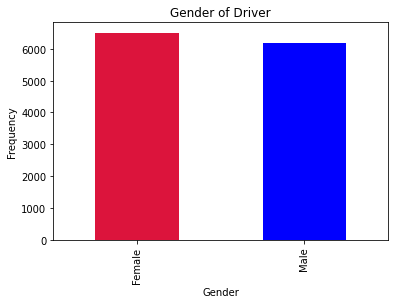

In [14]:
# Distribution of driver gender
plt.title('Gender of Driver')
plt.xlabel('Gender')
plt.ylabel('Frequency')
originaldf['gender'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['gender'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

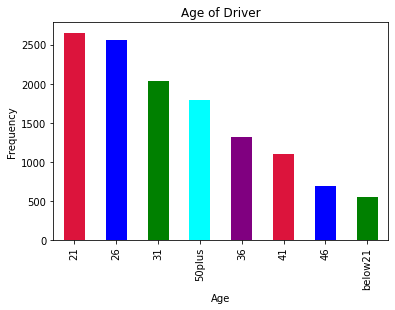

In [15]:
# Distribution of driver age
plt.title('Age of Driver')
plt.xlabel('Age')
plt.ylabel('Frequency')
originaldf['age'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['age'].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

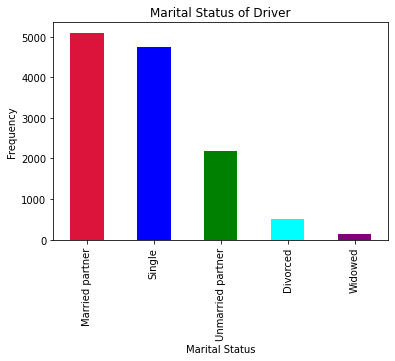

In [16]:
# Distribution of driver marital status
plt.title('Marital Status of Driver')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
originaldf['maritalStatus'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['maritalStatus'].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

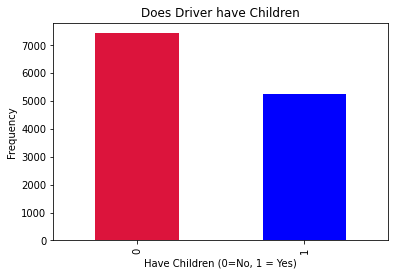

In [17]:
# Distribution of has_children
plt.title('Does Driver have Children')
plt.xlabel('Have Children (0=No, 1 = Yes)')
plt.ylabel('Frequency')
originaldf['has_children'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple'])
originaldf['has_children'].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

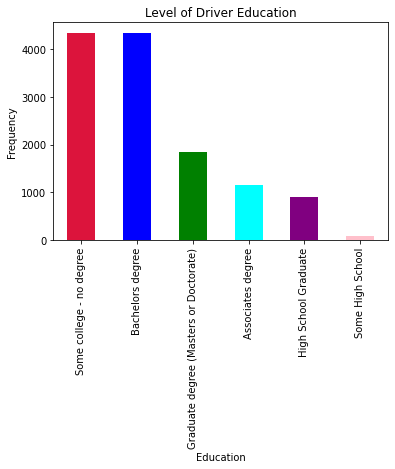

In [18]:
# Distribution of education
plt.title('Level of Driver Education')
plt.xlabel('Education')
plt.ylabel('Frequency')
originaldf['education'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink'])
originaldf['education'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Protective Service                            175
Architecture & Engineering                    175
Personal Care & Service                       175
Life Physical Social Science                  170


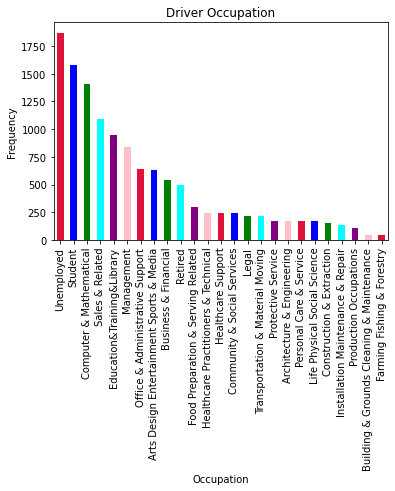

In [19]:
# Distribution of occupation
plt.title('Driver Occupation')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
originaldf['occupation'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink'])
originaldf['occupation'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

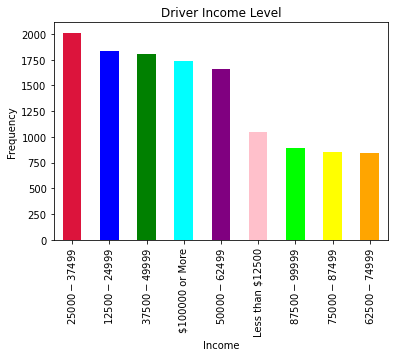

In [20]:
# Distribution of income
plt.title('Driver Income Level')
plt.xlabel('Income')
plt.ylabel('Frequency')
originaldf['income'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['income'].value_counts()

do not drive                                22
Scooter and motorcycle                      22
Mazda5                                      22
Car that is too old to install Onstar :D    21
crossover                                   21
Name: car, dtype: int64

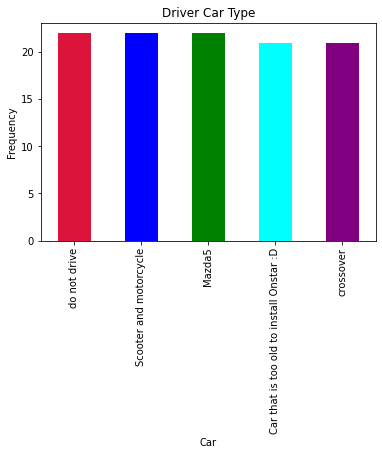

In [21]:
# Distribution of car
plt.title('Driver Car Type')
plt.xlabel('Car')
plt.ylabel('Frequency')
originaldf['car'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['car'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

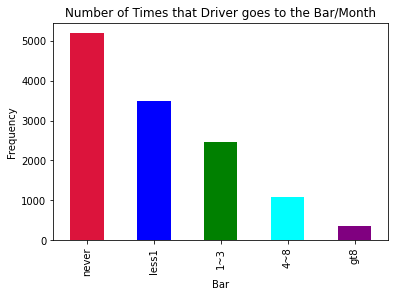

In [22]:
# Distribution of bar
plt.title('Number of Times that Driver goes to the Bar/Month')
plt.xlabel('Bar')
plt.ylabel('Frequency')
originaldf['Bar'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['Bar'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

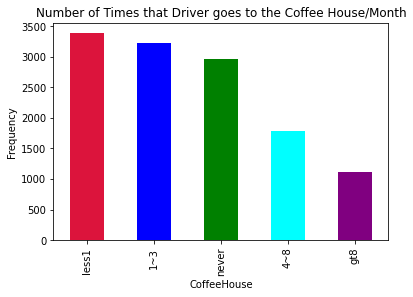

In [23]:
# Distribution of Coffee House
plt.title('Number of Times that Driver goes to the Coffee House/Month')
plt.xlabel('CoffeeHouse')
plt.ylabel('Frequency')
originaldf['CoffeeHouse'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['CoffeeHouse'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

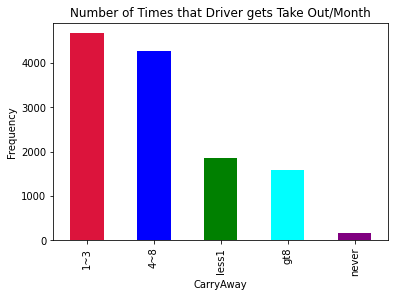

In [24]:
# Distribution of Carry Away
plt.title('Number of Times that Driver gets Take Out/Month')
plt.xlabel('CarryAway')
plt.ylabel('Frequency')
originaldf['CarryAway'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['CarryAway'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

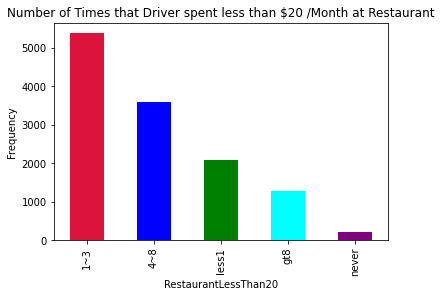

In [25]:
# Distribution of Restaurant Less than 20
plt.title('Number of Times that Driver spent less than $20 /Month at Restaurant')
plt.xlabel('RestaurantLessThan20')
plt.ylabel('Frequency')
originaldf['RestaurantLessThan20'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['RestaurantLessThan20'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

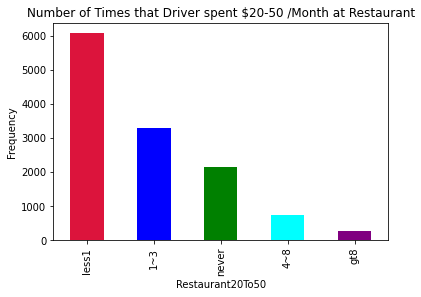

In [26]:
# Distribution of Restaurant Less than 20
plt.title('Number of Times that Driver spent $20-50 /Month at Restaurant')
plt.xlabel('Restaurant20To50')
plt.ylabel('Frequency')
originaldf['Restaurant20To50'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['Restaurant20To50'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

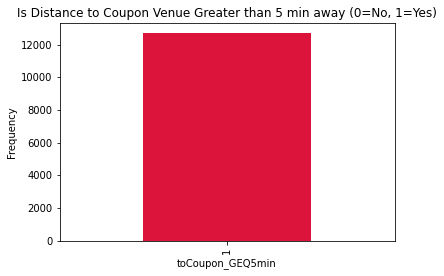

In [27]:
# Distribution of toCoupon_GEQ5min
plt.title('Is Distance to Coupon Venue Greater than 5 min away (0=No, 1=Yes)')
plt.xlabel('toCoupon_GEQ5min')
plt.ylabel('Frequency')
originaldf['toCoupon_GEQ5min'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['toCoupon_GEQ5min'].value_counts()

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64

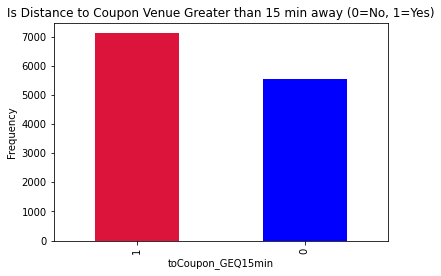

In [28]:
# Distribution of toCoupon_GEQ15min
plt.title('Is Distance to Coupon Venue Greater than 15 min away (0=No, 1=Yes)')
plt.xlabel('toCoupon_GEQ15min')
plt.ylabel('Frequency')
originaldf['toCoupon_GEQ15min'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['toCoupon_GEQ15min'].value_counts()

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

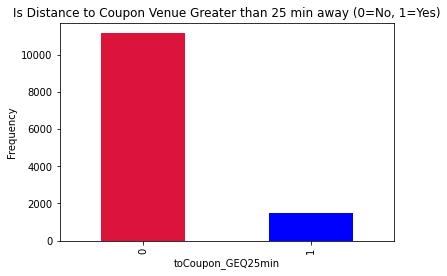

In [29]:
# Distribution of toCoupon_GEQ25min
plt.title('Is Distance to Coupon Venue Greater than 25 min away (0=No, 1=Yes)')
plt.xlabel('toCoupon_GEQ25min')
plt.ylabel('Frequency')
originaldf['toCoupon_GEQ25min'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['toCoupon_GEQ25min'].value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

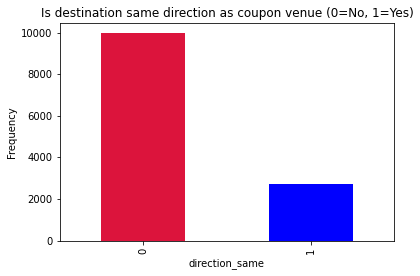

In [30]:
# Distribution of direction_same
plt.title('Is destination same direction as coupon venue (0=No, 1=Yes)')
plt.xlabel('direction_same')
plt.ylabel('Frequency')
originaldf['direction_same'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['direction_same'].value_counts()

1    9960
0    2724
Name: direction_opp, dtype: int64

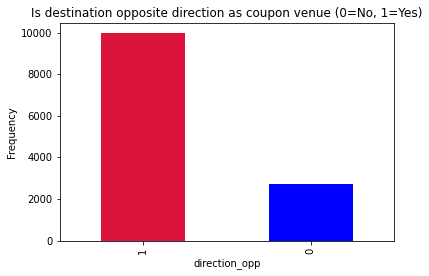

In [31]:
# Distribution of direction_opp
plt.title('Is destination opposite direction as coupon venue (0=No, 1=Yes)')
plt.xlabel('direction_opp')
plt.ylabel('Frequency')
originaldf['direction_opp'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['direction_opp'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

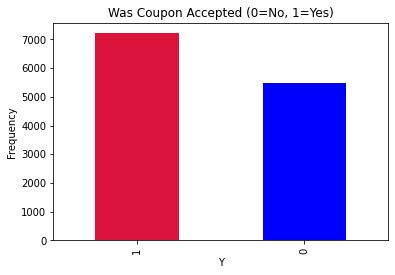

In [32]:
# Distribution of Y
plt.title('Was Coupon Accepted (0=No, 1=Yes)')
plt.xlabel('Y')
plt.ylabel('Frequency')
originaldf['Y'].value_counts().plot(kind='bar',color=['crimson','blue','green','cyan','purple', 'pink','lime','yellow','orange'])
originaldf['Y'].value_counts()

# Create Dataframe to be used Training and Test Sets

In [33]:
# Split data before applying data cleaning and feature selection to avoid data leakage
# Test set should not be used to train model
# First copy original dataset to new dataframe

df = originaldf.copy()
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0


## Modify Attributes Before Splitting the Data

### **Combine Coupon and Y attribute to make new multi-class target variable**

In [34]:
# The dataset contains two attributes, namely 'coupon' and 'Y'
# Before splitting the data, these two attributes will be combined in order to have the same target attribute between training and test sets
# The next steps will turn a binary target attribute into a multi class target attribute.  Hence these steps are being performed before splitting the data
# This is also done to ensure that when using the stratify feature for the train test split, the multi classes will be distributed properly

In [35]:
# Create function to compare coupon and Y attributes
# The function compares 'coupon' and 'Y'
# If 'Y' = 1 it means the coupon was accepted and the function will return the coupon attribute value
# If 'Y' = 0 it means that the coupon was not accepted and the function will return 'Not Accepted'
def combineAtt(s):
    if s['Y'] == 1:
        return s['coupon']
    else:
        return "Not Accepted"

In [36]:
# Apply function and create new target attribute
df['couponAccepted']=df.apply(combineAtt,axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [38]:
# Check that coupon and Y attribute merged properly

subsetcols = ['coupon','Y','couponAccepted']
subsetcheck = df[subsetcols]
subsetcheck.head(10)

,coupon,Y,couponAccepted
0,Restaurant(<20),1,Restaurant(<20)
1,Coffee House,0,Not Accepted
2,Carry out & Take away,1,Carry out & Take away
3,Coffee House,0,Not Accepted
4,Coffee House,0,Not Accepted
5,Restaurant(<20),1,Restaurant(<20)
6,Carry out & Take away,1,Carry out & Take away
7,Restaurant(<20),1,Restaurant(<20)
8,Carry out & Take away,1,Carry out & Take away
9,Bar,0,Not Accepted


In [39]:
# Check unique values of target variable
df['couponAccepted'].unique()

array(['Restaurant(<20)', 'Not Accepted', 'Carry out & Take away',
       'Coffee House', 'Bar', 'Restaurant(20-50)'], dtype=object)

Not Accepted             5474
Coffee House             1995
Restaurant(<20)          1970
Carry out & Take away    1760
Bar                       827
Restaurant(20-50)         658
Name: couponAccepted, dtype: int64

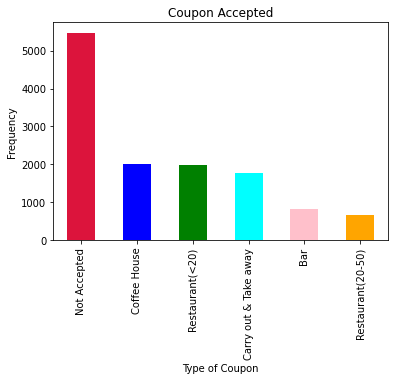

In [40]:
# Count number of occurences for each class label of target variable
# It can be seen that the new multiclass target attribute is unbalanced
plt.title('Coupon Accepted')
plt.xlabel('Type of Coupon')
plt.ylabel('Frequency')
df['couponAccepted'].value_counts().plot(kind='bar', color=['crimson','blue','green','cyan','pink','orange'])
df['couponAccepted'].value_counts()

In [41]:
# Now that couponAccepted is created, attributes Y and coupon are redundant. Therefore need to be removed
df = df.drop(columns=['coupon','Y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

### Modify Expiration Attribute

In [42]:
# Expiration attribute only has 2 values either 2 hours or 1 day
# To avoid having to encode this attribute for machine learning algorithms, this attribute values will be changed to numeric and represent number of hours
# 2h will become 2 (representing 2 hours)
# 1d will become 24 (representing 24 hours in a day)

In [43]:
df['expiration'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

In [44]:
# Replace 2h with 2 and 1d with 24
df['expiration'].replace({'2h':2, '1d':24}, inplace=True) # inplace=True means updates column

In [45]:
df['expiration'].value_counts()

24    7091
2     5593
Name: expiration, dtype: int64

### Check new totals for datatypes

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   expiration            12684 non-null  int64 
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

# Create Stratified Training and Test Sets

In [47]:
# Identify the target variable
targetClass = 'couponAccepted'

# Identify feature names
df_feature_names = df.columns[df.columns != targetClass]
df_feature_names

Index(['destination', 'passanger', 'weather', 'temperature', 'time',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp'],
      dtype='object')

In [48]:
# Display the target attribute
df[targetClass]

0              Restaurant(<20)
1                 Not Accepted
2        Carry out & Take away
3                 Not Accepted
4                 Not Accepted
                 ...          
12679    Carry out & Take away
12680    Carry out & Take away
12681             Not Accepted
12682             Not Accepted
12683             Not Accepted
Name: couponAccepted, Length: 12684, dtype: object

In [49]:
# Display all the feature attributes
df.loc[:, df_feature_names]

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,No Urgent Place,Alone,Sunny,55,2PM,24,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,2,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,2,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,2,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1
4,No Urgent Place,Friend(s),Sunny,80,2PM,24,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,24,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0
12680,Work,Alone,Rainy,55,7AM,24,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1
12681,Work,Alone,Snowy,30,7AM,24,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0
12682,Work,Alone,Snowy,30,7AM,24,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1


In [50]:
# Split data into training (70%) and test (30%)
# test_size = 30%
# random_state controls the shuffling applied.  Having a seed value allows for repeatable outcome
# shuffle allows for shuffling of data before splitting
# stratify allows same distribution of target classes in train and test since target attribute is unbalanced
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, df_feature_names], df[targetClass], test_size=0.3, random_state = 100, shuffle = True, stratify = df[targetClass])

In [51]:
# Check splits
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8878, 24), (3806, 24), (8878,), (3806,))

In [52]:
# Display attributes in training set
x_train

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
9066,No Urgent Place,Alone,Sunny,80,10AM,2,Female,26,Married partner,1,Bachelors degree,Computer & Mathematical,$100000 or More,NaN,1~3,1~3,4~8,4~8,less1,1,1,0,0,1
6037,Home,Alone,Sunny,80,6PM,24,Female,26,Unmarried partner,0,Some college - no degree,Management,$37500 - $49999,NaN,less1,less1,less1,1~3,less1,1,0,0,1,0
10395,Home,Alone,Sunny,80,6PM,24,Male,41,Married partner,1,Bachelors degree,Arts Design Entertainment Sports & Media,$37500 - $49999,NaN,NaN,less1,1~3,4~8,1~3,1,0,0,1,0
12633,Work,Alone,Sunny,80,7AM,2,Female,21,Unmarried partner,0,Bachelors degree,Unemployed,$37500 - $49999,NaN,never,4~8,1~3,1~3,less1,1,0,0,1,0
8591,No Urgent Place,Partner,Sunny,80,10PM,24,Female,21,Unmarried partner,0,Bachelors degree,Education&Training&Library,$25000 - $37499,NaN,1~3,1~3,less1,1~3,never,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,Work,Alone,Rainy,55,7AM,24,Male,46,Single,0,Some college - no degree,Sales & Related,Less than $12500,NaN,1~3,1~3,4~8,4~8,4~8,1,0,0,0,1
6001,Work,Alone,Sunny,80,7AM,24,Female,50plus,Divorced,0,Graduate degree (Masters or Doctorate),Retired,$37500 - $49999,NaN,never,never,4~8,1~3,never,1,1,1,0,1
5008,No Urgent Place,Friend(s),Sunny,80,6PM,24,Female,31,Married partner,0,Some college - no degree,Unemployed,$50000 - $62499,NaN,never,never,1~3,gt8,1~3,1,1,0,0,1
6693,No Urgent Place,Friend(s),Rainy,55,10AM,2,Male,21,Single,0,High School Graduate,Unemployed,Less than $12500,NaN,4~8,gt8,less1,1~3,never,1,1,0,0,1


In [53]:
# Verify that split has stratified the dataset
y_train.value_counts()

Not Accepted             3831
Coffee House             1396
Restaurant(<20)          1379
Carry out & Take away    1232
Bar                       579
Restaurant(20-50)         461
Name: couponAccepted, dtype: int64

## Processing the Training Set

### Impute Null Values

In [54]:
# Check for null values
x_train.isna().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     8815
Bar                       78
CoffeeHouse              148
CarryAway                110
RestaurantLessThan20      89
Restaurant20To50         129
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
dtype: int64

In [55]:
# Since the dataset is categorical, missing values should be replaced the value having the highest mode for each attribute
# If there is a tie for the highest mode, the below code will randomly choose one of the highest modes for imputation.  
# Therefore it is possible that each null value may be imputed with different values for a given feature

#### Car

In [56]:
# This attribute is basically missing values for almost all the records.  As such, it will not provide much value to the machine learning algorithms
# Therefore it will be dropped from the training dataset
x_train = x_train.drop(columns=['car'])
print('car attribute dropped')

car attribute dropped


#### Bar

In [57]:
# Check number of NA values
x_train['Bar'].isna().sum()

78

In [58]:
# Check for highest mode and determine if there is a tie for the highest mode
x_train['Bar'].value_counts()

never    3646
less1    2423
1~3      1723
4~8       761
gt8       247
Name: Bar, dtype: int64

In [59]:
# Create variable to store the mode for attribute.
# The mode may be bimodal or higher
bar_mode = [x_train['Bar'].mode()[0]] # made into a list
bar_mode

['never']

In [60]:
# This step imputes the highest mode for all null values
# If there is a tie in the mode, null value will be replaced by randomly selecting one of the highest mode

bar_dummy = [] # Create empty list to store data in loop

for index, row in x_train.iterrows():
  if (pd.isnull(row['Bar'])): # if value is null
    row['Bar']= random.choice(bar_mode) # randomly choose one of the mode values
    bar_dummy.append(row['Bar']) # add random choice to dummy list
  else:
    row['Bar'] = row['Bar'] # if value is not null
    bar_dummy.append(row['Bar'])

bar_dummy =pd.DataFrame(bar_dummy, index=x_train['Bar'].index) # Create dataframe with same indexing as original dataframe
bar_dummy.value_counts()

never    3724
less1    2423
1~3      1723
4~8       761
gt8       247
dtype: int64

In [61]:
# Compare dataframes to ensure non null values were not altered
# Each row should be identical except for the rows containing missing values

barbar = pd.concat([bar_dummy,x_train['Bar']], axis=1)
barbar.head(15)

,0,Bar
9066,1~3,1~3
6037,less1,less1
10395,never,NaN
12633,never,never
8591,1~3,1~3
9399,4~8,4~8
11172,never,never
11175,never,never
31,never,never
11138,1~3,1~3


In [62]:
# Replace Null values for Bar with mode
x_train['Bar']= bar_dummy
x_train['Bar'].value_counts()

never    3724
less1    2423
1~3      1723
4~8       761
gt8       247
Name: Bar, dtype: int64

#### Coffee House

In [63]:
# Check number of NA values
x_train['CoffeeHouse'].isna().sum()

148

In [64]:
# Check for highest mode and determine if there is a tie for the highest mode
x_train['CoffeeHouse'].value_counts()

less1    2402
1~3      2253
never    2083
4~8      1221
gt8       771
Name: CoffeeHouse, dtype: int64

In [65]:
# Create variable to store the mode for the attribute
# The mode may be bimodal or higher
CoffeeHouse_mode = [x_train['CoffeeHouse'].mode()[0]] # made into a list
CoffeeHouse_mode

['less1']

In [66]:
# This step imputes the highest mode for all null values
# If there is a tie in the mode, null value will be replaced by randomly selecting one of the highest mode

CoffeeHouse_dummy = [] # Create empty list to store data in loop

for index, row in x_train.iterrows():
  if (pd.isnull(row['CoffeeHouse'])): # if value is null
    row['CoffeeHouse']= random.choice(CoffeeHouse_mode) # randomly choose one of the mode values
    CoffeeHouse_dummy.append(row['CoffeeHouse']) # add random choice to dummy list
  else:
    row['CoffeeHouse'] = row['CoffeeHouse'] # if value is not null
    CoffeeHouse_dummy.append(row['CoffeeHouse'])

CoffeeHouse_dummy =pd.DataFrame(CoffeeHouse_dummy, index=x_train['CoffeeHouse'].index) # Create dataframe with same indexing as original dataframe
CoffeeHouse_dummy.value_counts()

less1    2550
1~3      2253
never    2083
4~8      1221
gt8       771
dtype: int64

In [67]:
# Replace Null values for CoffeeHouse with mode
x_train['CoffeeHouse'] = CoffeeHouse_dummy
x_train['CoffeeHouse'].value_counts()

less1    2550
1~3      2253
never    2083
4~8      1221
gt8       771
Name: CoffeeHouse, dtype: int64

#### Carry Away

In [68]:
# Check number of NA values
x_train['CarryAway'].isna().sum()

110

In [69]:
# Check for highest mode and determine if there is a tie for the highest mode
x_train['CarryAway'].value_counts()

1~3      3277
4~8      2955
less1    1323
gt8      1102
never     111
Name: CarryAway, dtype: int64

In [70]:
# Create variable to store the mode for the attribute
# The mode may be bimodal or higher
CarryAway_mode = [x_train['CarryAway'].mode()[0]] # made into a list
CarryAway_mode

['1~3']

In [71]:
# This step imputes the highest mode for all null values
# If there is a tie in the mode, null value will be replaced by randomly selecting one of the highest mode

CarryAway_dummy = [] # Create empty list to store data in loop

for index, row in x_train.iterrows():
  if (pd.isnull(row['CarryAway'])): # if value is null
    row['CarryAway']= random.choice(CarryAway_mode) # randomly choose one of the mode values
    CarryAway_dummy.append(row['CarryAway']) # add random choice to dummy list
  else:
    row['CarryAway'] = row['CarryAway'] # if value is not null
    CarryAway_dummy.append(row['CarryAway'])

CarryAway_dummy =pd.DataFrame(CarryAway_dummy, index=x_train['CarryAway'].index) # Create dataframe with same indexing as original dataframe
CarryAway_dummy.value_counts()

1~3      3387
4~8      2955
less1    1323
gt8      1102
never     111
dtype: int64

In [72]:
# Replace Null values for CarryAway with mode
x_train['CarryAway'] = CarryAway_dummy
x_train['CarryAway'].value_counts()

1~3      3387
4~8      2955
less1    1323
gt8      1102
never     111
Name: CarryAway, dtype: int64

#### Restaurant Less than 20

In [73]:
# Check number of NA values
x_train['RestaurantLessThan20'].isna().sum()

89

In [74]:
# Check for highest mode and determine if there is a tie for the highest mode
x_train['RestaurantLessThan20'].value_counts()

1~3      3817
4~8      2470
less1    1446
gt8       905
never     151
Name: RestaurantLessThan20, dtype: int64

In [75]:
# Create variable to store the mode for the attribute
# The mode may be bimodal or higher
RestaurantLessThan20_mode = [x_train['RestaurantLessThan20'].mode()[0]] # made into a list
RestaurantLessThan20_mode

['1~3']

In [76]:
# This step imputes the highest mode for all null values
# If there is a tie in the mode, null value will be replaced by randomly selecting one of the highest mode

RestaurantLessThan20_dummy = [] # Create empty list to store data in loop

for index, row in x_train.iterrows():
  if (pd.isnull(row['RestaurantLessThan20'])): # if value is null
    row['RestaurantLessThan20']= random.choice(RestaurantLessThan20_mode) # randomly choose one of the mode values
    RestaurantLessThan20_dummy.append(row['RestaurantLessThan20']) # add random choice to dummy list
  else:
    row['RestaurantLessThan20'] = row['RestaurantLessThan20'] # if value is not null
    RestaurantLessThan20_dummy.append(row['RestaurantLessThan20'])

RestaurantLessThan20_dummy =pd.DataFrame(RestaurantLessThan20_dummy, index=x_train['RestaurantLessThan20'].index) # Create dataframe with same indexing as original dataframe
RestaurantLessThan20_dummy.value_counts()

1~3      3906
4~8      2470
less1    1446
gt8       905
never     151
dtype: int64

In [77]:
# Replace Null values for RestaurantLessThan20 with mode
x_train['RestaurantLessThan20'] = RestaurantLessThan20_dummy
x_train['RestaurantLessThan20'].value_counts()

1~3      3906
4~8      2470
less1    1446
gt8       905
never     151
Name: RestaurantLessThan20, dtype: int64

#### Restaurant 20 to 50

In [78]:
# Check number of NA values
x_train['Restaurant20To50'].isna().sum()

129

In [79]:
# Check for highest mode and determine if there is a tie for the highest mode
x_train['Restaurant20To50'].value_counts()

less1    4255
1~3      2330
never    1467
4~8       509
gt8       188
Name: Restaurant20To50, dtype: int64

In [80]:
# Create variable to store the mode for the attribute
# The mode may be bimodal or higher
Restaurant20To50_mode = [x_train['Restaurant20To50'].mode()[0]] # made into a list
Restaurant20To50_mode

['less1']

In [81]:
# This step imputes the highest mode for all null values
# If there is a tie in the mode, null value will be replaced by randomly selecting one of the highest mode

Restaurant20To50_dummy = [] # Create empty list to store data in loop

for index, row in x_train.iterrows():
  if (pd.isnull(row['Restaurant20To50'])): # if value is null
    row['Restaurant20To50']= random.choice(Restaurant20To50_mode) # randomly choose one of the mode values
    Restaurant20To50_dummy.append(row['Restaurant20To50']) # add random choice to dummy list
  else:
    row['Restaurant20To50'] = row['Restaurant20To50'] # if value is not null
    Restaurant20To50_dummy.append(row['Restaurant20To50'])

Restaurant20To50_dummy =pd.DataFrame(Restaurant20To50_dummy, index=x_train['Restaurant20To50'].index) # Create dataframe with same indexing as original dataframe
Restaurant20To50_dummy.value_counts()

less1    4384
1~3      2330
never    1467
4~8       509
gt8       188
dtype: int64

In [82]:
# Replace Null values for Restaurant20To50 with mode
x_train['Restaurant20To50'] = Restaurant20To50_dummy
x_train['Restaurant20To50'].value_counts()

less1    4384
1~3      2330
never    1467
4~8       509
gt8       188
Name: Restaurant20To50, dtype: int64

#### Verify that all Null Values in Training Set are Removed

In [83]:
x_train.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
dtype: int64

### Outliers

In [84]:
# The dataset either contains categorical or numeric attributes
# For categorical attributes there cannot be any outliers
# For the numerical attributes, they can be thought of as encoded attributes (i.e. 0 = 'no' and 1 = 'yes').  Therefore, there will not be any outliers for these attributes as well
# If outliers were present, the following could be done to address them:
#   1. Leave them, as they could be natural outliers
#   2. Drop the record containing outliers
#   3. Replace outliers with the mean of the attribute
#   4. Try to transform the data (ex. binning)

### **Encoding: Ordinal Categorical Attribute**

In [85]:
# There are several attributes that are ordinal and must be encoded that way so that the model does not overfit.  
# It also allows less attributes to be one hot encoded (i.e. creating more columns)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8878 entries, 9066 to 12444
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           8878 non-null   object
 1   passanger             8878 non-null   object
 2   weather               8878 non-null   object
 3   temperature           8878 non-null   int64 
 4   time                  8878 non-null   object
 5   expiration            8878 non-null   int64 
 6   gender                8878 non-null   object
 7   age                   8878 non-null   object
 8   maritalStatus         8878 non-null   object
 9   has_children          8878 non-null   int64 
 10  education             8878 non-null   object
 11  occupation            8878 non-null   object
 12  income                8878 non-null   object
 13  Bar                   8878 non-null   object
 14  CoffeeHouse           8878 non-null   object
 15  CarryAway             8878 non-nul

#### Temperature

In [86]:
# Original temperature attribute
df['temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

In [87]:
# This atttribute will be kept as integer value.  Encoding it will make the algorithm assume the distance between each encoded value is the same

#### Time

In [88]:
# Original time attribute
df['time'].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

In [89]:
# Since time is cyclic, no ranking can be established. Therefore this attribute will not be ordinally encoded

#### Age

In [90]:
# Original age attribute
x_train['age'].value_counts()

21         1887
26         1800
31         1388
50plus     1262
36          925
41          751
46          487
below21     378
Name: age, dtype: int64

In [91]:
# Encoding the age attribute 

# Create dictionary
dict_age = [{'col':'age','mapping':{'below21':1, '21':2, '26':3, '31':4, '36':5, '41':6, '46':7, '50plus':8}}]

# Create encoder for ordinal encoding
# handle unknown = value which means an unknown category will be imputed as -1
# handle missing = value which means null values will be imputed as nan as a category during fit, and -2 during transform
enc_age = ce.OrdinalEncoder(cols='age',mapping=dict_age, handle_unknown='value', handle_missing='value')

# Fit and transform data
x_train['age'] = enc_age.fit_transform(x_train['age'])

In [92]:
# After encoding age attribute
x_train['age'].value_counts()

2    1887
3    1800
4    1388
8    1262
5     925
6     751
7     487
1     378
Name: age, dtype: int64

#### Education

In [93]:
x_train['education'].value_counts()

Bachelors degree                          3089
Some college - no degree                  3023
Graduate degree (Masters or Doctorate)    1265
Associates degree                          811
High School Graduate                       630
Some High School                            60
Name: education, dtype: int64

In [94]:
# It was decided not to ordinal encode the 'education' attribute since after highschool, a person can do either college or university. 
# There is no ranking (i.e. is 'some college-no degree' higher or lower ranking than 'bachelors degree')
# Therefore this attribute will not be ordinally encoded

#### Income

In [95]:
# Original income attribute
x_train['income'].value_counts()

$25000 - $37499     1405
$12500 - $24999     1303
$37500 - $49999     1264
$100000 or More     1235
$50000 - $62499     1150
Less than $12500     737
$87500 - $99999      615
$75000 - $87499      589
$62500 - $74999      580
Name: income, dtype: int64

In [96]:
# Encoding the income attribute 

# Create dictionary
dict_income = [{'col':'income','mapping':{'Less than $12500':1, '$12500 - $24999':2, '$25000 - $37499':3, '$37500 - $49999':4, '$50000 - $62499':5, '$62500 - $74999':6, '$75000 - $87499':7, 
                                          '$87500 - $99999':8, '$100000 or More':9}}]

# Create encoder for ordinal encoding
# handle unknown = value which means an unknown category will be imputed as -1
# handle missing = value which means null values will be imputed as nan as a category during fit, and -2 during transform
enc_income = ce.OrdinalEncoder(cols='income',mapping=dict_income, handle_unknown='value', handle_missing='value' )

# Fit and transform data
x_train['income'] = enc_income.fit_transform(x_train['income'])

In [97]:
# After encoding income attribute
x_train['income'].value_counts()

3    1405
2    1303
4    1264
9    1235
5    1150
1     737
8     615
7     589
6     580
Name: income, dtype: int64

#### Bar

In [98]:
# Before encoding Bar attribute
x_train['Bar'].value_counts()

never    3724
less1    2423
1~3      1723
4~8       761
gt8       247
Name: Bar, dtype: int64

In [99]:
# Encoding the Bar attribute

# Create dictionary
dict_bar = [{'col':'Bar', 'mapping':{'never':1, 'less1':2, '1~3':3, '4~8':4, 'gt8':5}}]

# Create encoder for ordinal encoding
# handle unknown = value which means an unknown category will be imputed as -1
# handle missing = value which means null values will be imputed as nan as a category during fit, and -2 during transform
enc_bar = ce.OrdinalEncoder(cols='Bar', mapping=dict_bar, handle_unknown='value', handle_missing='value')

# Fit and transform data
x_train['Bar'] = enc_bar.fit_transform(x_train['Bar'])

In [100]:
# After encoding Bar attribute
x_train['Bar'].value_counts()

1    3724
2    2423
3    1723
4     761
5     247
Name: Bar, dtype: int64

#### Coffee House

In [101]:
# Before encoding Coffee House Attribute
x_train['CoffeeHouse'].value_counts()

less1    2550
1~3      2253
never    2083
4~8      1221
gt8       771
Name: CoffeeHouse, dtype: int64

In [102]:
# Encoding the Coffee House Attribute

# Create dictionary
dict_cof = [{'col':'CoffeeHouse', 'mapping':{'never':1, 'less1':2, '1~3':3, '4~8':4, 'gt8':5}}]

# Create encoder for ordinal encoding
# handle unknown = value which means an unknown category will be imputed as -1
# handle missing = value which means null values will be imputed as nan as a category during fit, and -2 during transform
enc_cof = ce.OrdinalEncoder(cols='CoffeeHouse', mapping=dict_cof, handle_unknown='value', handle_missing='value')

# Fit and transform data
x_train['CoffeeHouse'] = enc_cof.fit_transform(x_train['CoffeeHouse'])

In [103]:
# After encoding the Coffee House attribute
x_train['CoffeeHouse'].value_counts()

2    2550
3    2253
1    2083
4    1221
5     771
Name: CoffeeHouse, dtype: int64

#### Carry Away

In [104]:
# Before encoding Coffee House Attribute
x_train['CarryAway'].value_counts()

1~3      3387
4~8      2955
less1    1323
gt8      1102
never     111
Name: CarryAway, dtype: int64

In [105]:
# Encoding the Carry Away Attribute

# Create dictionary
dict_carry = [{'col':'CarryAway', 'mapping':{'never':1, 'less1':2, '1~3':3, '4~8':4, 'gt8':5}}]

# Create encoder for ordinal encoding
# handle unknown = value which means an unknown category will be imputed as -1
# handle missing = value which means null values will be imputed as nan as a category during fit, and -2 during transform
enc_carry = ce.OrdinalEncoder(cols='CarryAway', mapping=dict_carry, handle_unknown='value', handle_missing='value' )

# Fit and transform data
x_train['CarryAway'] = enc_carry.fit_transform(x_train['CarryAway'])

In [106]:
# After encoding the Carry Away attribute
x_train['CarryAway'].value_counts()

3    3387
4    2955
2    1323
5    1102
1     111
Name: CarryAway, dtype: int64

#### Restaurant Less than 20

In [107]:
# Before encoding Restaurant Less than 20 Attribute
x_train['RestaurantLessThan20'].value_counts()

1~3      3906
4~8      2470
less1    1446
gt8       905
never     151
Name: RestaurantLessThan20, dtype: int64

In [108]:
# Encoding the Restaurant Less Than 20 Attribute

# Create dictionary
dict_rest20 = [{'col':'RestaurantLessThan20', 'mapping':{'never':1, 'less1':2, '1~3':3, '4~8':4, 'gt8':5}}]

# Create encoder for ordinal encoding
# handle unknown = value which means an unknown category will be imputed as -1
# handle missing = value which means null values will be imputed as nan as a category during fit, and -2 during transform
enc_rest20 = ce.OrdinalEncoder(cols='RestaurantLessThan20', mapping=dict_rest20, handle_unknown='value', handle_missing='value')

# Fit and transform data
x_train['RestaurantLessThan20'] = enc_rest20.fit_transform(x_train['RestaurantLessThan20'])

In [109]:
# After encoding the Carry Away attribute
x_train['RestaurantLessThan20'].value_counts()

3    3906
4    2470
2    1446
5     905
1     151
Name: RestaurantLessThan20, dtype: int64

#### Restaurant 20 to 50

In [110]:
# Before encoding Restaurant 20 to 50 Attribute
x_train['Restaurant20To50'].value_counts()

less1    4384
1~3      2330
never    1467
4~8       509
gt8       188
Name: Restaurant20To50, dtype: int64

In [111]:
# Encoding the Restaurant 20 to 50Attribute

# Create dictionary
dict_rest50 = [{'col':'Restaurant20To50', 'mapping':{'never':1, 'less1':2, '1~3':3, '4~8':4, 'gt8':5}}]

# Create encoder for ordinal encoding
# handle unknown = value which means an unknown category will be imputed as -1
# handle missing = value which means null values will be imputed as nan as a category during fit, and -2 during transform
enc_rest50 = ce.OrdinalEncoder(cols='Restaurant20To50', mapping=dict_rest50, handle_unknown='value', handle_missing='value')

# Fit and transform data
x_train['Restaurant20To50'] = enc_rest50.fit_transform(x_train['Restaurant20To50'])

In [112]:
# After encoding the Carry Away attribute
x_train['Restaurant20To50'].value_counts()

2    4384
3    2330
1    1467
4     509
5     188
Name: Restaurant20To50, dtype: int64

#### Verify data type distribution

In [113]:
x_train.head()

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
9066,No Urgent Place,Alone,Sunny,80,10AM,2,Female,3,Married partner,1,Bachelors degree,Computer & Mathematical,9,3,3,4,4,2,1,1,0,0,1
6037,Home,Alone,Sunny,80,6PM,24,Female,3,Unmarried partner,0,Some college - no degree,Management,4,2,2,2,3,2,1,0,0,1,0
10395,Home,Alone,Sunny,80,6PM,24,Male,6,Married partner,1,Bachelors degree,Arts Design Entertainment Sports & Media,4,1,2,3,4,3,1,0,0,1,0
12633,Work,Alone,Sunny,80,7AM,2,Female,2,Unmarried partner,0,Bachelors degree,Unemployed,4,1,4,3,3,2,1,0,0,1,0
8591,No Urgent Place,Partner,Sunny,80,10PM,24,Female,2,Unmarried partner,0,Bachelors degree,Education&Training&Library,3,3,3,2,3,1,1,1,0,0,1


In [114]:
# Check new data type distribution
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8878 entries, 9066 to 12444
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           8878 non-null   object
 1   passanger             8878 non-null   object
 2   weather               8878 non-null   object
 3   temperature           8878 non-null   int64 
 4   time                  8878 non-null   object
 5   expiration            8878 non-null   int64 
 6   gender                8878 non-null   object
 7   age                   8878 non-null   int64 
 8   maritalStatus         8878 non-null   object
 9   has_children          8878 non-null   int64 
 10  education             8878 non-null   object
 11  occupation            8878 non-null   object
 12  income                8878 non-null   int64 
 13  Bar                   8878 non-null   int64 
 14  CoffeeHouse           8878 non-null   int64 
 15  CarryAway             8878 non-nul

### Encoding: One Hot Encoding of Unordered Categorical Attribute

In [115]:
# make copy of dataframe to be used for one hot encoding
hot_x_train = x_train.copy()
hot_x_train

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
9066,No Urgent Place,Alone,Sunny,80,10AM,2,Female,3,Married partner,1,Bachelors degree,Computer & Mathematical,9,3,3,4,4,2,1,1,0,0,1
6037,Home,Alone,Sunny,80,6PM,24,Female,3,Unmarried partner,0,Some college - no degree,Management,4,2,2,2,3,2,1,0,0,1,0
10395,Home,Alone,Sunny,80,6PM,24,Male,6,Married partner,1,Bachelors degree,Arts Design Entertainment Sports & Media,4,1,2,3,4,3,1,0,0,1,0
12633,Work,Alone,Sunny,80,7AM,2,Female,2,Unmarried partner,0,Bachelors degree,Unemployed,4,1,4,3,3,2,1,0,0,1,0
8591,No Urgent Place,Partner,Sunny,80,10PM,24,Female,2,Unmarried partner,0,Bachelors degree,Education&Training&Library,3,3,3,2,3,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,Work,Alone,Rainy,55,7AM,24,Male,7,Single,0,Some college - no degree,Sales & Related,1,3,3,4,4,4,1,0,0,0,1
6001,Work,Alone,Sunny,80,7AM,24,Female,8,Divorced,0,Graduate degree (Masters or Doctorate),Retired,4,1,1,4,3,1,1,1,1,0,1
5008,No Urgent Place,Friend(s),Sunny,80,6PM,24,Female,4,Married partner,0,Some college - no degree,Unemployed,5,1,1,3,5,3,1,1,0,0,1
6693,No Urgent Place,Friend(s),Rainy,55,10AM,2,Male,2,Single,0,High School Graduate,Unemployed,1,4,5,2,3,1,1,1,0,0,1


In [116]:
hot_x_train.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
expiration               int64
gender                  object
age                      int64
maritalStatus           object
has_children             int64
education               object
occupation              object
income                   int64
Bar                      int64
CoffeeHouse              int64
CarryAway                int64
RestaurantLessThan20     int64
Restaurant20To50         int64
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
dtype: object

In [117]:
# create list of categorical variables to be encoded.
catCols = ['destination','passanger','weather', 'time', 'gender', 'maritalStatus', 'education', 'occupation' ]
hot_x_train[catCols]

# perform the one hot encoding
# columns = variables to be encoded
# prefix = name to appear in front of dummy variables
hot_x_train = pd.get_dummies(hot_x_train, columns = catCols, prefix = catCols)

In [118]:
hot_x_train

,temperature,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,gender_Female,gender_Male,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
9066,80,2,3,1,9,3,3,4,4,2,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6037,80,24,3,0,4,2,2,2,3,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10395,80,24,6,1,4,1,2,3,4,3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12633,80,2,2,0,4,1,4,3,3,2,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8591,80,24,2,0,3,3,3,2,3,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,55,24,7,0,1,3,3,4,4,4,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6001,80,24,8,0,4,1,1,4,3,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5008,80,24,4,0,5,1,1,3,5,3,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6693,55,2,2,0,1,4,5,2,3,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Create training set dataframe

In [119]:
# Before encoding
y_train.value_counts()

Not Accepted             3831
Coffee House             1396
Restaurant(<20)          1379
Carry out & Take away    1232
Bar                       579
Restaurant(20-50)         461
Name: couponAccepted, dtype: int64

In [120]:
y_train

9066              Coffee House
6037              Coffee House
10395             Not Accepted
12633             Not Accepted
8591           Restaurant(<20)
                 ...          
11053             Not Accepted
6001     Carry out & Take away
5008           Restaurant(<20)
6693     Carry out & Take away
12444             Not Accepted
Name: couponAccepted, Length: 8878, dtype: object

In [121]:
# Make new dataframe for training set
hot_train = pd.concat([hot_x_train,y_train], axis=1)
hot_train

,temperature,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,gender_Female,gender_Male,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,couponAccepted
9066,80,2,3,1,9,3,3,4,4,2,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Coffee House
6037,80,24,3,0,4,2,2,2,3,2,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Coffee House
10395,80,24,6,1,4,1,2,3,4,3,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Not Accepted
12633,80,2,2,0,4,1,4,3,3,2,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Not Accepted
8591,80,24,2,0,3,3,3,2,3,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Restaurant(<20)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,55,24,7,0,1,3,3,4,4,4,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Not Accepted
6001,80,24,8,0,4,1,1,4,3,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,Carry out & Take away
5008,80,24,4,0,5,1,1,3,5,3,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Restaurant(<20)
6693,55,2,2,0,1,4,5,2,3,1,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,Carry out & Take away


### Feature Scaling

In [122]:
# The classification models to be used are tree based (i.e. decision trees and random forests)
# Therefore, feature scaling is not required as they are insensitive to the scale of the features (i.e. tree is split based on a single feature and not influenced by the other features)
# Multinomial logistic regression also does not require feature scaling

### Feature Selection Methods

In [123]:
# Apply different feature selection techniques to determine best features for building the model
# The top 25 features will be selected from each method.
# 25 features was chosen as a threshold, which is 37% of the total number of features

#### Information Gain - Filter Method

In [124]:
# Evaluate information gain of each attribute to the target attribute
# The higher the gain the more the attribute can predict the target attribute
# Used for discrete target variables
from sklearn.feature_selection import mutual_info_classif

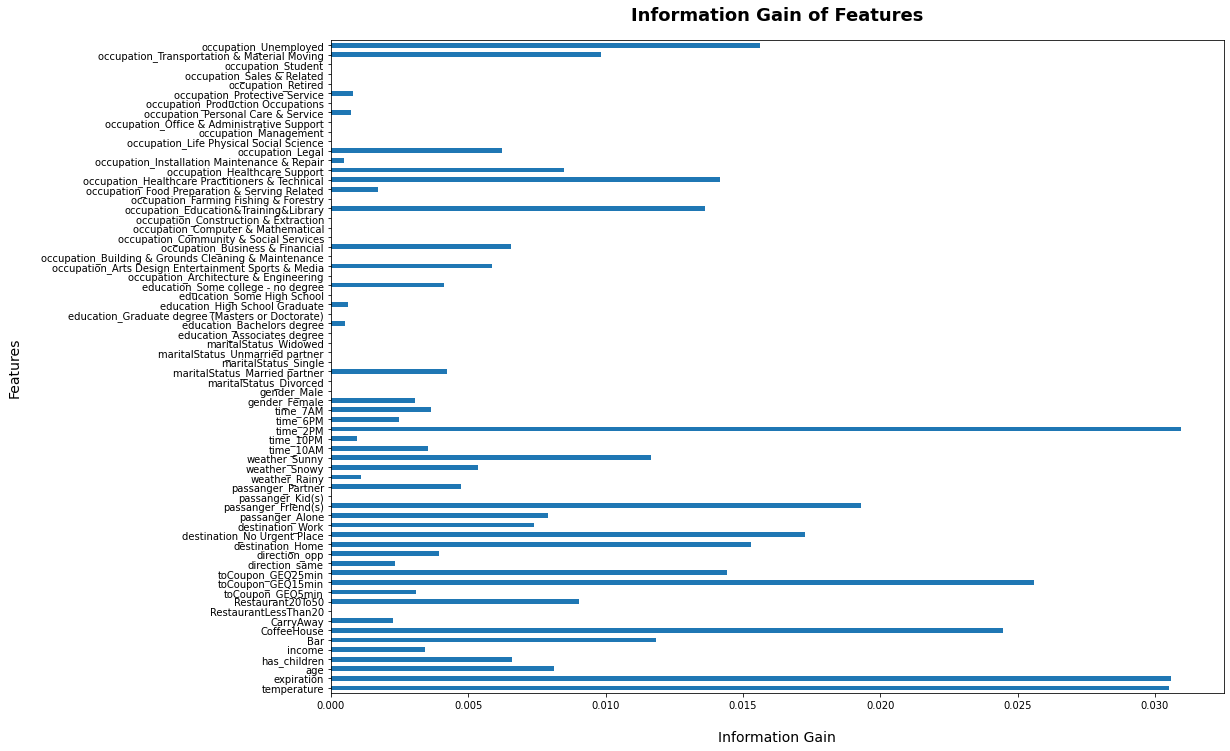

In [125]:
%matplotlib inline

importances = mutual_info_classif(hot_x_train,y_train, n_neighbors = 3, random_state=100) # n_neighbours only applies for continuous variables (KNN)
feat_importances = pd.Series(importances, hot_train.columns[0:len(hot_x_train.columns)])
plt.figure(figsize = (16,12))
plt.title ('Information Gain of Features', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Information Gain', fontsize=14, labelpad=20)
plt.ylabel('Features', fontsize=14, labelpad=20)
feat_importances.plot(kind='barh')
plt.show()

In [126]:
# Show top 25 features with highest information gain
feat_importances.sort_values(ascending=False).head(25)

time_2PM                                               0.030956
expiration                                             0.030583
temperature                                            0.030500
toCoupon_GEQ15min                                      0.025593
CoffeeHouse                                            0.024451
passanger_Friend(s)                                    0.019296
destination_No Urgent Place                            0.017254
occupation_Unemployed                                  0.015619
destination_Home                                       0.015297
toCoupon_GEQ25min                                      0.014415
occupation_Healthcare Practitioners & Technical        0.014168
occupation_Education&Training&Library                  0.013612
Bar                                                    0.011819
weather_Sunny                                          0.011642
occupation_Transportation & Material Moving            0.009821
Restaurant20To50                        

#### Chi Square - Filter Method

In [127]:
# Useful for categorical attributes feature selection with categorical target
from sklearn.feature_selection import chi2

In [128]:
chi_scores = chi2(hot_x_train, y_train)
chi_scores # First array is the chi square values and the second array is the p values

(array([1.91478023e+03, 2.73717323e+03, 6.67152868e+01, 3.33783520e+01,
        1.88962893e+01, 9.55366663e+01, 1.22551075e+02, 3.35250523e+00,
        6.93778835e+00, 2.68301787e+01, 3.70335160e-29, 1.12098687e+02,
        2.17186876e+02, 8.95749611e+01, 2.45534121e+01, 2.04903821e+02,
        2.31349434e+02, 6.67854273e+01, 6.43461921e+01, 2.03321391e+02,
        4.02782775e+01, 8.39364884e+01, 1.69767231e+02, 6.41545915e+01,
        4.56659671e+01, 1.42560594e+02, 1.61468039e+02, 2.72194783e+02,
        4.95994164e+01, 6.67854273e+01, 1.43284698e+01, 1.51451527e+01,
        7.36713789e+00, 1.70943850e+01, 2.86482849e+01, 3.16313786e+00,
        6.93872975e+00, 9.50655893e+00, 4.36834955e+00, 2.16049016e+01,
        1.94987580e+00, 1.04013552e+01, 1.48913897e+01, 7.89465787e+00,
        8.10147298e+00, 2.19378456e+00, 3.83446759e+00, 9.81891556e+00,
        6.75657867e+00, 8.78542937e+00, 7.53709895e+00, 1.73625881e+00,
        3.27340257e+00, 1.09948899e+01, 8.23549805e+00, 4.000655

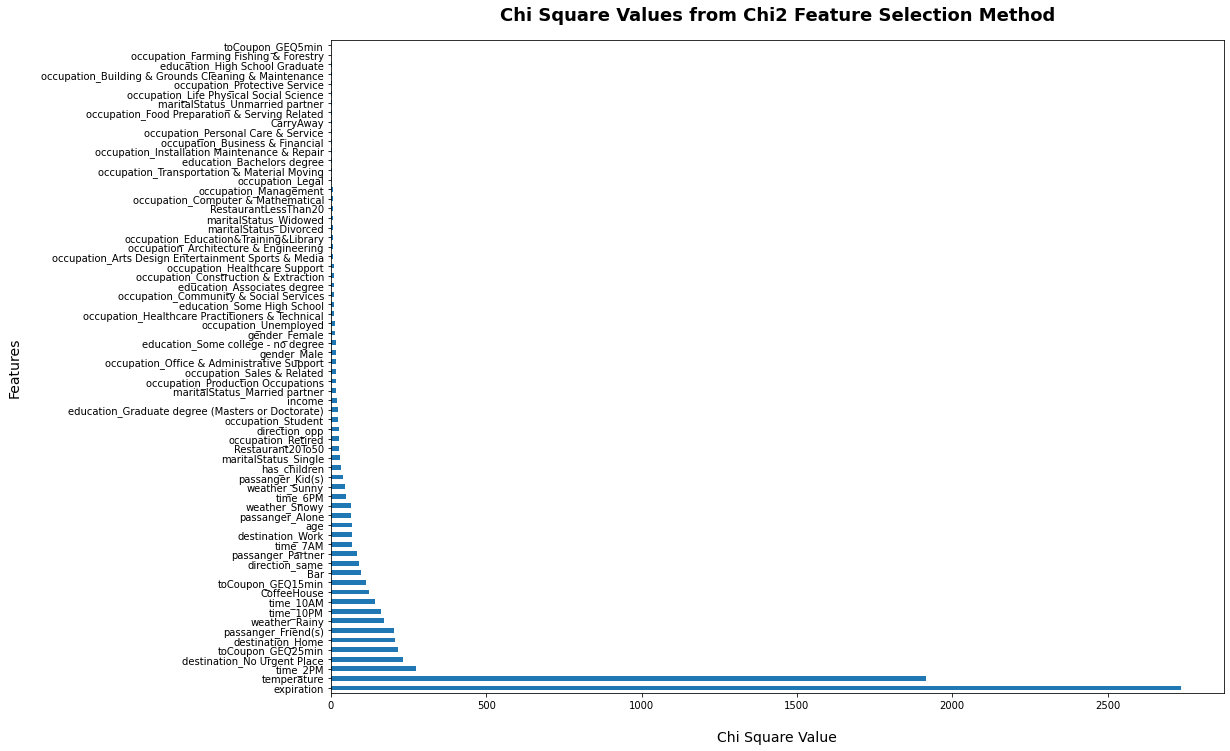

In [129]:
# Plot the Chi Square Values
p_values = pd.Series(chi_scores[0], index =hot_x_train.columns)
p_values.sort_values (ascending = False, inplace=True)
plt.figure(figsize = (16,12))
plt.title ('Chi Square Values from Chi2 Feature Selection Method', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Features', fontsize=14, labelpad=20)
plt.xlabel('Chi Square Value', fontsize=14, labelpad=20)
p_values.plot.barh()

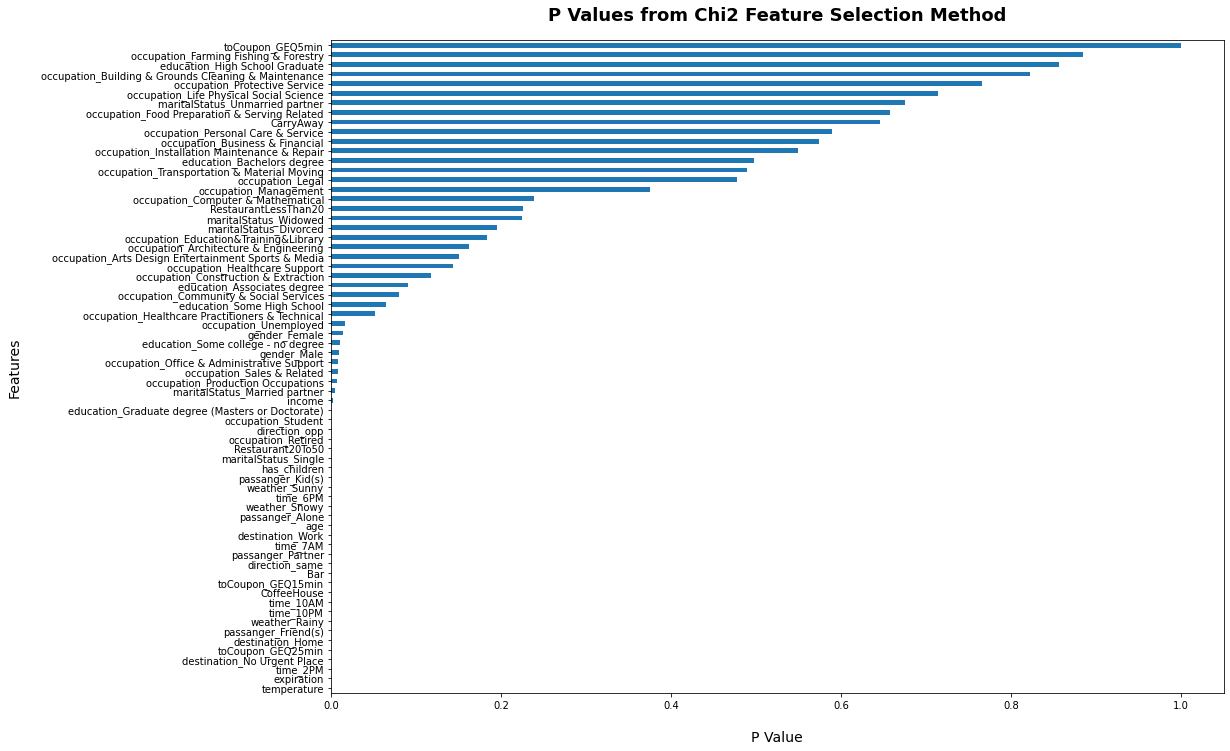

In [130]:
# Plot the P values
p_values = pd.Series(chi_scores[1], index =hot_x_train.columns)
p_values.sort_values (ascending = True, inplace=True)
plt.figure(figsize = (16,12))
plt.title ('P Values from Chi2 Feature Selection Method', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Features', fontsize=14, labelpad=20)
plt.xlabel('P Value', fontsize=14, labelpad=20)
p_values.plot.barh()

In [131]:
# The higher the P value the more independent that attribute is and will not help model training
# Therefore, features with lower p values are better for target prediction
p_values.sort_values(ascending=True).head(25)

temperature                    0.000000e+00
expiration                     0.000000e+00
time_2PM                       9.453008e-57
destination_No Urgent Place    5.494771e-48
toCoupon_GEQ25min              5.950087e-45
destination_Home               2.536222e-42
passanger_Friend(s)            5.531035e-42
weather_Rainy                  8.180230e-35
time_10PM                      4.815630e-33
time_10AM                      5.108401e-29
CoffeeHouse                    9.041783e-25
toCoupon_GEQ15min              1.475261e-22
Bar                            4.603787e-19
direction_same                 8.252877e-18
passanger_Partner              1.257755e-16
destination_Work               4.774507e-13
time_7AM                       4.774507e-13
age                            4.937363e-13
passanger_Alone                1.531409e-12
weather_Snowy                  1.678084e-12
time_6PM                       1.673598e-09
weather_Sunny                  1.062125e-08
passanger_Kid(s)               1

#### Recursive Feature Elimination with Cross Validation- Wrapper Method

In [132]:
# Feature selection through feature elimination by recursively choosing smaller and smaller subsets of features through pruning least important features
# More computationally expensive than filter methods
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

In [133]:
# Use random forest classifier to select features
# estimator is the algorithm used for feature selection
# step is number of features to remove at each iteration
# cv is cross validation technique
rfe = RFECV(estimator=RandomForestClassifier(criterion= 'gini',n_estimators=5, class_weight='balanced', random_state=100), # 5 decision trees
            step=1, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=100), scoring='roc_auc_ovr_weighted')  # 10 stratified folds

In [134]:
# Fit the model
rfe.fit(hot_x_train,y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=100, shuffle=True),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight='balanced',
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=5, n_jobs=None,
                                       oob_score=False, random_state=100,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='roc_auc_ovr_weighted',
      step=1, ver

In [135]:
# Determine how many features are optimal 
print ('Optimal number of features: {}'.format(rfe.n_features_))

Optimal number of features: 30


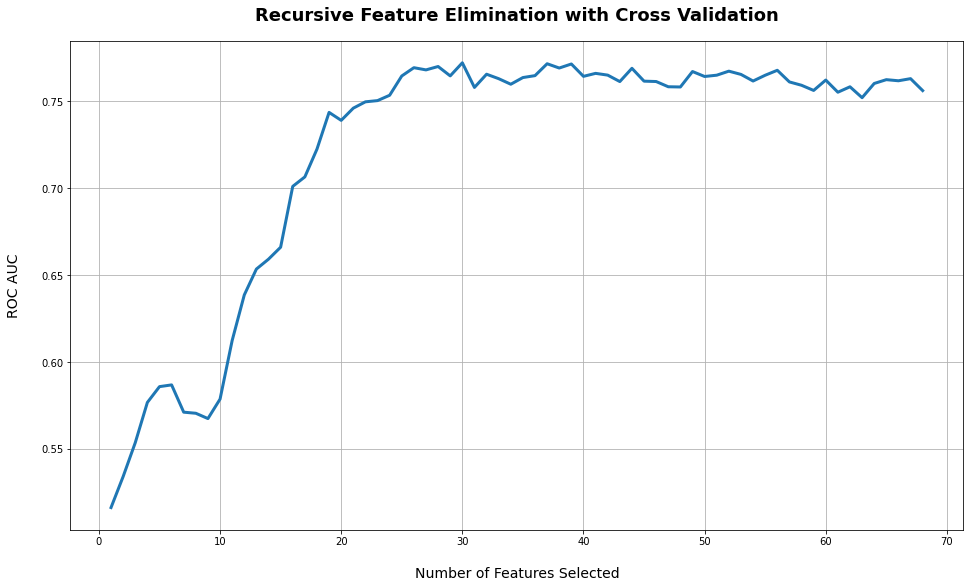

In [136]:
# Plot Accuracy vs number of features used
plt.figure(figsize=(16,9))
plt.title ('Recursive Feature Elimination with Cross Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Features Selected', fontsize=14, labelpad=20)
plt.ylabel('ROC AUC', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfe.grid_scores_)+1), rfe.grid_scores_, linewidth=3)
plt.grid(True)
plt.show()

In [137]:
# List optimal features
print(hot_x_train.columns[rfe.support_])

Index(['temperature', 'expiration', 'age', 'has_children', 'income', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_opp',
       'destination_Home', 'passanger_Alone', 'passanger_Friend(s)',
       'passanger_Partner', 'weather_Snowy', 'weather_Sunny', 'time_10AM',
       'time_10PM', 'time_2PM', 'time_6PM', 'gender_Female', 'gender_Male',
       'maritalStatus_Married partner', 'maritalStatus_Single',
       'education_Bachelors degree', 'education_Some college - no degree',
       'occupation_Unemployed'],
      dtype='object')


In [138]:
# Order optimal features in decreasing importance
dset = pd.DataFrame()
dset['attr'] = hot_x_train.columns[rfe.support_]
dset['importance'] = rfe.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending =False)
dset

,attr,importance
0,temperature,0.070556
4,income,0.065715
2,age,0.061699
6,CoffeeHouse,0.055223
5,Bar,0.048748
7,CarryAway,0.045833
8,RestaurantLessThan20,0.045235
9,Restaurant20To50,0.044275
10,toCoupon_GEQ15min,0.043549
1,expiration,0.040175


#### Lasso Regularization - Embedded Method

In [139]:
# This method adds penalties to the coefficients of the certain features in order to reduce them to zero, which essentially removes them from the model
# This helps to avoid overfitting
from sklearn.linear_model import Lasso, LogisticRegression # logistic regression used for classification problems
from sklearn.feature_selection import SelectFromModel # Select features based on weights
from sklearn.preprocessing import StandardScaler # Since logistic regression will be used as the estimator, feature scaling required

In [140]:
# Features scaling to improve feature selection
scaler = StandardScaler()
lasso_x = scaler.fit_transform(hot_x_train)
lasso_x

array([[ 0.87087052, -1.12694617, -0.58429246, ..., -0.38266951,
        -0.13504087, -0.41474474],
       [ 0.87087052,  0.88735383, -0.58429246, ..., -0.38266951,
        -0.13504087, -0.41474474],
       [ 0.87087052,  0.88735383,  0.81693619, ..., -0.38266951,
        -0.13504087, -0.41474474],
       ...,
       [ 0.87087052,  0.88735383, -0.11721624, ..., -0.38266951,
        -0.13504087,  2.41112158],
       [-0.43184026, -1.12694617, -1.05136868, ..., -0.38266951,
        -0.13504087,  2.41112158],
       [ 0.87087052, -1.12694617,  1.75108863, ..., -0.38266951,
        -0.13504087,  2.41112158]])

In [141]:
# penalty l1 to shrink coefficients to zero
# C is the strength of the regularization.  Smaller value means stronger regularization
# penalty = l1 attempts to shrink the coefficients of each feature to zero as a means to remove unimportant features. 
# penalty = l2 reduces coefficients close to 0 so its not good for feature selection
lasso_sel = SelectFromModel(estimator = LogisticRegression(C=0.01, penalty='l1', class_weight = 'balanced', solver='liblinear', random_state=100)) 
# lasso_sel = SelectFromModel(Lasso(alpha=100))
lasso_sel.fit(lasso_x, y_train) # train model

SelectFromModel(estimator=LogisticRegression(C=0.01, class_weight='balanced',
                                             dual=False, fit_intercept=True,
                                             intercept_scaling=1, l1_ratio=None,
                                             max_iter=100, multi_class='auto',
                                             n_jobs=None, penalty='l1',
                                             random_state=100,
                                             solver='liblinear', tol=0.0001,
                                             verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [142]:
# See which features are selected
lasso_sel.get_support()

array([ True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False,  True])

In [143]:
# Display coefficients of features
# Will display 6 arrays because there are 6 target classes
lasso_sel.estimator_.coef_

array([[-0.14665684,  0.4449728 ,  0.        , -0.03241886,  0.        ,
         0.38062702,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.35095599,  0.09725528, -0.0807834 ,
         0.        ,  0.32999134, -0.06280469,  0.        ,  0.        ,
         0.        ,  0.05633325,  0.1240033 , -0.07922028,  0.        ,
         0.        ,  0.09442141, -0.3367574 ,  0.08073953, -0.05146783,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.07186639,  0.02884784,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.04379038],
   

In [144]:
# Show important features
lasso_features = hot_x_train.columns[(lasso_sel.get_support())]
lasso_features

Index(['temperature', 'expiration', 'age', 'has_children', 'Bar',
       'CoffeeHouse', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp',
       'destination_Home', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Rainy', 'weather_Snowy', 'weather_Sunny', 'time_10AM',
       'time_10PM', 'time_2PM', 'time_6PM', 'time_7AM', 'gender_Male',
       'maritalStatus_Single', 'education_Some college - no degree',
       'occupation_Architecture & Engineering',
       'occupation_Computer & Mathematical',
       'occupation_Office & Administrative Support', 'occupation_Retired',
       'occupation_Sales & Related', 'occupation_Unemployed'],
      dtype='object')

In [145]:
# print ('Total Features: {}'.format((hot_x_train.shape[1])))
print ('Selected Features: {}'.format(len(lasso_features)))
# print ('Features with Coefficients Reduced to Zero: {}'.format(np.sum(lasso_sel.estimator_.coef_==0)))

Selected Features: 34


#### Random Forest - Embedded Method

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
# Use random forest to select features
# Used 1000 decision trees that will go to max depth using gini impurity criterion
rf_model = RandomForestClassifier(n_estimators=1000, criterion = 'gini', class_weight='balanced',)
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [148]:
# train model
rf_model.fit(hot_x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
# Determine impurity based feature importances
# The higher the value the more important
rf_model_important = rf_model.feature_importances_
rf_model_important

array([0.07283777, 0.04900671, 0.04490555, 0.01536171, 0.05004928,
       0.03671458, 0.04236301, 0.03534562, 0.03323665, 0.03444411,
       0.        , 0.06018781, 0.02097677, 0.01555222, 0.01594302,
       0.01174726, 0.01227394, 0.00732266, 0.01940569, 0.02105512,
       0.01159477, 0.01722401, 0.01229496, 0.01293774, 0.01958234,
       0.01867488, 0.02024827, 0.01622583, 0.0252668 , 0.00754115,
       0.0136737 , 0.01378686, 0.00377521, 0.01297751, 0.0145869 ,
       0.01115437, 0.00116629, 0.0086013 , 0.01496256, 0.01043721,
       0.00644081, 0.0015654 , 0.01542657, 0.0023373 , 0.00520456,
       0.0008065 , 0.00581183, 0.00297275, 0.01037934, 0.00230074,
       0.00744569, 0.00054265, 0.00338952, 0.00307541, 0.00277482,
       0.00174907, 0.00239118, 0.0018995 , 0.00727423, 0.00689781,
       0.00222258, 0.00146951, 0.00188483, 0.00395126, 0.0090706 ,
       0.01008564, 0.00288876, 0.01229898])

In [150]:
# Create dataframe to show features and importance
rf_model_df = pd.DataFrame({'Features': pd.DataFrame(hot_x_train).columns, 'Importances': rf_model_important})
rf_model_df.set_index('Importances')

# Order in decreasing importance ()
rf_model_df = rf_model_df.sort_values('Importances', ascending=False)

# Add a column that adds number of features
rf_model_df['No. of Features'] = range(1, len(rf_model_df)+1)

# Add a column that adds the importances cumulatively
rf_model_df['Cumulative Importance'] = rf_model_df['Importances'].cumsum()

In [151]:
# Display dataframe
rf_model_df.head(38)

# After the 38th feature, feature importance changes by less that 0.01 (Assumed threshold)

,Features,Importances,No. of Features,Cumulative Importance
0,temperature,0.072838,1,0.072838
11,toCoupon_GEQ15min,0.060188,2,0.133026
4,income,0.050049,3,0.183075
1,expiration,0.049007,4,0.232082
2,age,0.044906,5,0.276987
6,CoffeeHouse,0.042363,6,0.319350
5,Bar,0.036715,7,0.356065
7,CarryAway,0.035346,8,0.391410
9,Restaurant20To50,0.034444,9,0.425854
8,RestaurantLessThan20,0.033237,10,0.459091


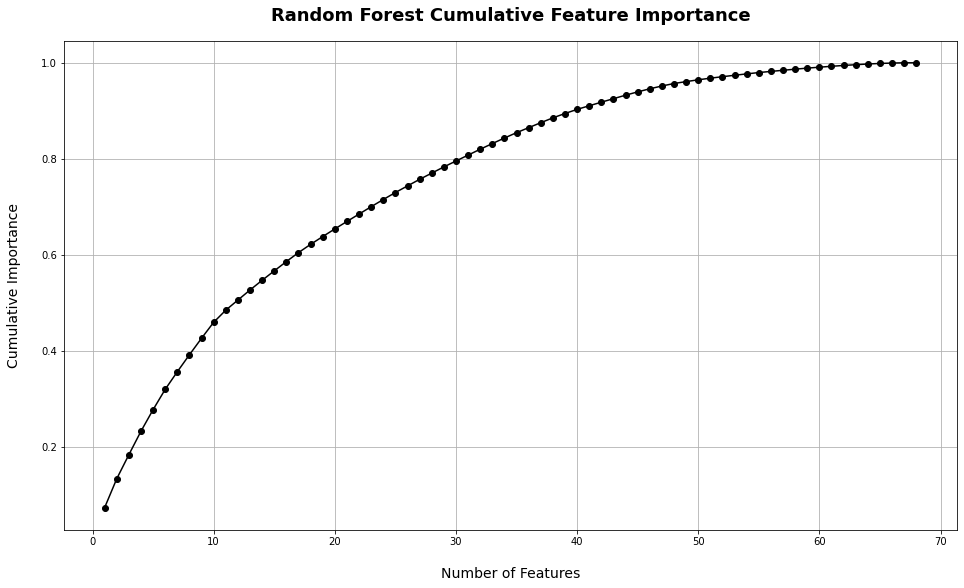

In [152]:
# Display graph of accumulated importances
plt.figure(figsize=(16,9))
plt.title ('Random Forest Cumulative Feature Importance', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Features', fontsize=14, labelpad=20)
plt.ylabel('Cumulative Importance', fontsize=14, labelpad=20)
plt.plot(rf_model_df['No. of Features'], rf_model_df['Cumulative Importance'], '-ok')
plt.grid(True)
plt.show()

### Updating Training Set to only Have Selected Features

In [153]:
# The above feature selection methods displayed the top 25 features that were found to have the highest imapct to target classfication
# Out of the top 25 features for each selection method, 24 appeared in all three selection methods types
# 8 additional features appeared in the wrapper and embedded selection methods
# 2 additional features appeared in the filter and wrapper selection methods
# These 13 + 8 + 3 features will be used to build the model
# Model can be optimized by adding or removing attributes
feature_att = ['temperature', 'expiration', 'time_2PM', 'passanger_Friend(s)', 'destination_Home', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 
               'CoffeeHouse', 'Bar', 'weather_Sunny', 'Restaurant20To50', 'age', 'has_children', 
               'time_10PM', 'time_10AM', 'passanger_Partner', 'time_6PM', 'maritalStatus_Single', 'direction_opp', 'education_Some college - no degree', 'gender_Male',
               'weather_Snowy', 'occupation_Unemployed', 'destination_No Urgent Place']
feature_att

['temperature',
 'expiration',
 'time_2PM',
 'passanger_Friend(s)',
 'destination_Home',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'CoffeeHouse',
 'Bar',
 'weather_Sunny',
 'Restaurant20To50',
 'age',
 'has_children',
 'time_10PM',
 'time_10AM',
 'passanger_Partner',
 'time_6PM',
 'maritalStatus_Single',
 'direction_opp',
 'education_Some college - no degree',
 'gender_Male',
 'weather_Snowy',
 'occupation_Unemployed',
 'destination_No Urgent Place']

In [154]:
# Select features want to keep for the machine learning model
feat_x_train = hot_x_train[feature_att]

In [155]:
feat_x_train

,temperature,expiration,time_2PM,passanger_Friend(s),destination_Home,toCoupon_GEQ15min,toCoupon_GEQ25min,CoffeeHouse,Bar,weather_Sunny,Restaurant20To50,age,has_children,time_10PM,time_10AM,passanger_Partner,time_6PM,maritalStatus_Single,direction_opp,education_Some college - no degree,gender_Male,weather_Snowy,occupation_Unemployed,destination_No Urgent Place
9066,80,2,0,0,0,1,0,3,3,1,2,3,1,0,1,0,0,0,1,0,0,0,0,1
6037,80,24,0,0,1,0,0,2,2,1,2,3,0,0,0,0,1,0,0,1,0,0,0,0
10395,80,24,0,0,1,0,0,2,1,1,3,6,1,0,0,0,1,0,0,0,1,0,0,0
12633,80,2,0,0,0,0,0,4,1,1,2,2,0,0,0,0,0,0,0,0,0,0,1,0
8591,80,24,0,0,0,1,0,3,3,1,1,2,0,1,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11053,55,24,0,0,0,0,0,3,3,0,4,7,0,0,0,0,0,1,1,1,1,0,0,0
6001,80,24,0,0,0,1,1,1,1,1,1,8,0,0,0,0,0,0,1,0,0,0,0,0
5008,80,24,0,1,0,1,0,1,1,1,3,4,0,0,0,0,1,0,1,1,0,0,1,1
6693,55,2,0,1,0,1,0,5,4,0,1,2,0,0,1,0,0,1,1,0,1,0,1,1


### Updating the Test Set

In [156]:
x_test

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
426,Work,Alone,Sunny,55,7AM,24,Male,50plus,Married partner,0,Bachelors degree,Personal Care & Service,$50000 - $62499,NaN,never,less1,less1,1~3,less1,1,1,1,0,1
6025,Work,Alone,Sunny,55,7AM,24,Female,26,Single,0,Bachelors degree,Unemployed,Less than $12500,NaN,4~8,1~3,gt8,4~8,1~3,1,1,0,0,1
8835,Home,Alone,Snowy,30,10PM,2,Female,31,Married partner,0,Some college - no degree,Arts Design Entertainment Sports & Media,$100000 or More,NaN,less1,less1,gt8,4~8,less1,1,1,1,0,1
6921,No Urgent Place,Partner,Snowy,30,2PM,2,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,NaN,gt8,1~3,1~3,4~8,less1,1,1,0,0,1
12400,No Urgent Place,Alone,Sunny,80,10AM,2,Female,36,Married partner,1,Bachelors degree,Education&Training&Library,$37500 - $49999,NaN,less1,NaN,1~3,1~3,1~3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,Work,Alone,Rainy,55,7AM,2,Female,46,Married partner,0,Bachelors degree,Construction & Extraction,$12500 - $24999,NaN,1~3,4~8,4~8,1~3,less1,1,1,1,0,1
4940,No Urgent Place,Alone,Sunny,80,10AM,24,Male,31,Single,0,High School Graduate,Production Occupations,$25000 - $37499,NaN,1~3,never,4~8,1~3,less1,1,0,0,0,1
6915,No Urgent Place,Friend(s),Snowy,30,10AM,24,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,NaN,gt8,1~3,1~3,4~8,less1,1,1,0,0,1
234,Work,Alone,Sunny,80,7AM,2,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,NaN,1~3,1~3,1~3,1~3,1~3,1,0,0,1,0


In [157]:
hot_x_test = x_test.copy()
hot_x_test

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
426,Work,Alone,Sunny,55,7AM,24,Male,50plus,Married partner,0,Bachelors degree,Personal Care & Service,$50000 - $62499,NaN,never,less1,less1,1~3,less1,1,1,1,0,1
6025,Work,Alone,Sunny,55,7AM,24,Female,26,Single,0,Bachelors degree,Unemployed,Less than $12500,NaN,4~8,1~3,gt8,4~8,1~3,1,1,0,0,1
8835,Home,Alone,Snowy,30,10PM,2,Female,31,Married partner,0,Some college - no degree,Arts Design Entertainment Sports & Media,$100000 or More,NaN,less1,less1,gt8,4~8,less1,1,1,1,0,1
6921,No Urgent Place,Partner,Snowy,30,2PM,2,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,NaN,gt8,1~3,1~3,4~8,less1,1,1,0,0,1
12400,No Urgent Place,Alone,Sunny,80,10AM,2,Female,36,Married partner,1,Bachelors degree,Education&Training&Library,$37500 - $49999,NaN,less1,NaN,1~3,1~3,1~3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,Work,Alone,Rainy,55,7AM,2,Female,46,Married partner,0,Bachelors degree,Construction & Extraction,$12500 - $24999,NaN,1~3,4~8,4~8,1~3,less1,1,1,1,0,1
4940,No Urgent Place,Alone,Sunny,80,10AM,24,Male,31,Single,0,High School Graduate,Production Occupations,$25000 - $37499,NaN,1~3,never,4~8,1~3,less1,1,0,0,0,1
6915,No Urgent Place,Friend(s),Snowy,30,10AM,24,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,NaN,gt8,1~3,1~3,4~8,less1,1,1,0,0,1
234,Work,Alone,Sunny,80,7AM,2,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,NaN,1~3,1~3,1~3,1~3,1~3,1,0,0,1,0


#### Drop Records with Null Values on Test Set

In [158]:
# Check for null values
hot_x_test.isna().sum()

destination                0
passanger                  0
weather                    0
temperature                0
time                       0
expiration                 0
gender                     0
age                        0
maritalStatus              0
has_children               0
education                  0
occupation                 0
income                     0
car                     3761
Bar                       29
CoffeeHouse               69
CarryAway                 41
RestaurantLessThan20      41
Restaurant20To50          60
toCoupon_GEQ5min           0
toCoupon_GEQ15min          0
toCoupon_GEQ25min          0
direction_same             0
direction_opp              0
dtype: int64

##### Drop Car

In [159]:
# This attribute is basically missing values for almost all the records.  As such, it will not provide much value to the machine learning algorithms
# It will be dropped from the test set as was done for the training set
hot_x_test = hot_x_test.drop(columns=['car'])
print('car attribute dropped')

car attribute dropped


##### Create dataframe of test set

In [160]:
hot_test = pd.concat([hot_x_test,y_test], axis=1)
hot_test

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,couponAccepted
426,Work,Alone,Sunny,55,7AM,24,Male,50plus,Married partner,0,Bachelors degree,Personal Care & Service,$50000 - $62499,never,less1,less1,1~3,less1,1,1,1,0,1,Bar
6025,Work,Alone,Sunny,55,7AM,24,Female,26,Single,0,Bachelors degree,Unemployed,Less than $12500,4~8,1~3,gt8,4~8,1~3,1,1,0,0,1,Not Accepted
8835,Home,Alone,Snowy,30,10PM,2,Female,31,Married partner,0,Some college - no degree,Arts Design Entertainment Sports & Media,$100000 or More,less1,less1,gt8,4~8,less1,1,1,1,0,1,Not Accepted
6921,No Urgent Place,Partner,Snowy,30,2PM,2,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,gt8,1~3,1~3,4~8,less1,1,1,0,0,1,Coffee House
12400,No Urgent Place,Alone,Sunny,80,10AM,2,Female,36,Married partner,1,Bachelors degree,Education&Training&Library,$37500 - $49999,less1,NaN,1~3,1~3,1~3,1,0,0,0,1,Not Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,Work,Alone,Rainy,55,7AM,2,Female,46,Married partner,0,Bachelors degree,Construction & Extraction,$12500 - $24999,1~3,4~8,4~8,1~3,less1,1,1,1,0,1,Not Accepted
4940,No Urgent Place,Alone,Sunny,80,10AM,24,Male,31,Single,0,High School Graduate,Production Occupations,$25000 - $37499,1~3,never,4~8,1~3,less1,1,0,0,0,1,Not Accepted
6915,No Urgent Place,Friend(s),Snowy,30,10AM,24,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,gt8,1~3,1~3,4~8,less1,1,1,0,0,1,Carry out & Take away
234,Work,Alone,Sunny,80,7AM,2,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,1~3,1~3,1~3,1~3,1~3,1,0,0,1,0,Not Accepted


In [161]:
# Remove rows that contain null values instead of imputing them to keep the test set unchanged
# axis = 0 drops rows with missing values
# how = any drops row if any value is missing
hot_test.dropna(axis=0, how='any', inplace=True)
hot_test.shape

(3625, 24)

In [162]:
# Split the test data set to dependent and independent variables
hot_x_test = hot_test.drop(['couponAccepted'], axis=1)
y_test = hot_test['couponAccepted']
hot_x_test.shape, y_test.shape

((3625, 23), (3625,))

In [163]:
hot_x_test

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
426,Work,Alone,Sunny,55,7AM,24,Male,50plus,Married partner,0,Bachelors degree,Personal Care & Service,$50000 - $62499,never,less1,less1,1~3,less1,1,1,1,0,1
6025,Work,Alone,Sunny,55,7AM,24,Female,26,Single,0,Bachelors degree,Unemployed,Less than $12500,4~8,1~3,gt8,4~8,1~3,1,1,0,0,1
8835,Home,Alone,Snowy,30,10PM,2,Female,31,Married partner,0,Some college - no degree,Arts Design Entertainment Sports & Media,$100000 or More,less1,less1,gt8,4~8,less1,1,1,1,0,1
6921,No Urgent Place,Partner,Snowy,30,2PM,2,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,gt8,1~3,1~3,4~8,less1,1,1,0,0,1
430,No Urgent Place,Alone,Sunny,55,2PM,24,Male,26,Single,0,Bachelors degree,Computer & Mathematical,$50000 - $62499,never,1~3,1~3,less1,less1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,Work,Alone,Rainy,55,7AM,2,Female,46,Married partner,0,Bachelors degree,Construction & Extraction,$12500 - $24999,1~3,4~8,4~8,1~3,less1,1,1,1,0,1
4940,No Urgent Place,Alone,Sunny,80,10AM,24,Male,31,Single,0,High School Graduate,Production Occupations,$25000 - $37499,1~3,never,4~8,1~3,less1,1,0,0,0,1
6915,No Urgent Place,Friend(s),Snowy,30,10AM,24,Male,31,Unmarried partner,0,Some college - no degree,Sales & Related,$62500 - $74999,gt8,1~3,1~3,4~8,less1,1,1,0,0,1
234,Work,Alone,Sunny,80,7AM,2,Female,21,Unmarried partner,0,Bachelors degree,Management,$87500 - $99999,1~3,1~3,1~3,1~3,1~3,1,0,0,1,0


In [164]:
y_test

426                       Bar
6025             Not Accepted
8835             Not Accepted
6921             Coffee House
430           Restaurant(<20)
                ...          
8185             Not Accepted
4940             Not Accepted
6915    Carry out & Take away
234              Not Accepted
2663             Not Accepted
Name: couponAccepted, Length: 3625, dtype: object

##### Verify that all Null Values are eliminated

In [165]:
# Check that all Null Values are eliminated
hot_x_test.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
dtype: int64

#### Encoding Ordinal Attributes

In [166]:
# Encode Feature attributes like training set
hot_x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3625 entries, 426 to 2663
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3625 non-null   object
 1   passanger             3625 non-null   object
 2   weather               3625 non-null   object
 3   temperature           3625 non-null   int64 
 4   time                  3625 non-null   object
 5   expiration            3625 non-null   int64 
 6   gender                3625 non-null   object
 7   age                   3625 non-null   object
 8   maritalStatus         3625 non-null   object
 9   has_children          3625 non-null   int64 
 10  education             3625 non-null   object
 11  occupation            3625 non-null   object
 12  income                3625 non-null   object
 13  Bar                   3625 non-null   object
 14  CoffeeHouse           3625 non-null   object
 15  CarryAway             3625 non-null 

##### Age

In [167]:
# Fit and transform data
hot_x_test['age'] = enc_age.transform(hot_x_test['age'])

##### Income

In [168]:
# Fit and transform data
hot_x_test['income'] = enc_income.transform(hot_x_test['income'])

##### Bar

In [169]:
# Fit and transform data
hot_x_test['Bar'] = enc_bar.transform(hot_x_test['Bar'])

##### Coffee House

In [170]:
# Fit and transform data
hot_x_test['CoffeeHouse'] = enc_cof.transform(hot_x_test['CoffeeHouse'])

##### Carry Away

In [171]:
# Fit and transform data
hot_x_test['CarryAway'] = enc_carry.transform(hot_x_test['CarryAway'])

##### Restaurant Less than 20

In [172]:
# Fit and transform data
hot_x_test['RestaurantLessThan20'] = enc_rest20.transform(hot_x_test['RestaurantLessThan20'])

##### Restaurant 20 to 50

In [173]:
# Fit and transform data
hot_x_test['Restaurant20To50'] = enc_rest50.transform(hot_x_test['Restaurant20To50'])

##### Verify Datatype Distribution

In [174]:
hot_x_test.head()

,destination,passanger,weather,temperature,time,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
426,Work,Alone,Sunny,55,7AM,24,Male,8,Married partner,0,Bachelors degree,Personal Care & Service,5,1,2,2,3,2,1,1,1,0,1
6025,Work,Alone,Sunny,55,7AM,24,Female,3,Single,0,Bachelors degree,Unemployed,1,4,3,5,4,3,1,1,0,0,1
8835,Home,Alone,Snowy,30,10PM,2,Female,4,Married partner,0,Some college - no degree,Arts Design Entertainment Sports & Media,9,2,2,5,4,2,1,1,1,0,1
6921,No Urgent Place,Partner,Snowy,30,2PM,2,Male,4,Unmarried partner,0,Some college - no degree,Sales & Related,6,5,3,3,4,2,1,1,0,0,1
430,No Urgent Place,Alone,Sunny,55,2PM,24,Male,3,Single,0,Bachelors degree,Computer & Mathematical,5,1,3,3,2,2,1,0,0,0,1


In [175]:
hot_x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3625 entries, 426 to 2663
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3625 non-null   object
 1   passanger             3625 non-null   object
 2   weather               3625 non-null   object
 3   temperature           3625 non-null   int64 
 4   time                  3625 non-null   object
 5   expiration            3625 non-null   int64 
 6   gender                3625 non-null   object
 7   age                   3625 non-null   int64 
 8   maritalStatus         3625 non-null   object
 9   has_children          3625 non-null   int64 
 10  education             3625 non-null   object
 11  occupation            3625 non-null   object
 12  income                3625 non-null   int64 
 13  Bar                   3625 non-null   int64 
 14  CoffeeHouse           3625 non-null   int64 
 15  CarryAway             3625 non-null 

#### One Hot Encoding

In [176]:
# perform the one hot encoding on test set
# columns = variables to be encoded
# prefix = name to appear in front of dummy variables
hot_x_test = pd.get_dummies(hot_x_test, columns = catCols, prefix = catCols)

In [177]:
hot_x_test

,temperature,expiration,age,has_children,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,gender_Female,gender_Male,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
426,55,24,8,0,5,1,2,2,3,2,1,1,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6025,55,24,3,0,1,4,3,5,4,3,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8835,30,2,4,0,9,2,2,5,4,2,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6921,30,2,4,0,6,5,3,3,4,2,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
430,55,24,3,0,5,1,3,3,2,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,55,2,7,0,2,3,4,4,3,2,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4940,80,24,4,0,3,3,1,4,3,2,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6915,30,24,4,0,6,5,3,3,4,2,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
234,80,2,2,0,8,3,3,3,3,3,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Updating Test Set to only Have Selected Features

In [178]:
# Ensure Test set has same features as training set, otherwise cannot apply trained model because different number of features
feat_x_test = hot_x_test[feature_att]

In [179]:
feat_x_test

,temperature,expiration,time_2PM,passanger_Friend(s),destination_Home,toCoupon_GEQ15min,toCoupon_GEQ25min,CoffeeHouse,Bar,weather_Sunny,Restaurant20To50,age,has_children,time_10PM,time_10AM,passanger_Partner,time_6PM,maritalStatus_Single,direction_opp,education_Some college - no degree,gender_Male,weather_Snowy,occupation_Unemployed,destination_No Urgent Place
426,55,24,0,0,0,1,1,2,1,1,2,8,0,0,0,0,0,0,1,0,1,0,0,0
6025,55,24,0,0,0,1,0,3,4,1,3,3,0,0,0,0,0,1,1,0,0,0,1,0
8835,30,2,0,0,1,1,1,2,2,0,2,4,0,1,0,0,0,0,1,1,0,1,0,0
6921,30,2,1,0,0,1,0,3,5,0,2,4,0,0,0,1,0,0,1,1,1,1,0,1
430,55,24,1,0,0,0,0,3,1,1,2,3,0,0,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,55,2,0,0,0,1,1,4,3,0,2,7,0,0,0,0,0,0,1,0,0,0,0,0
4940,80,24,0,0,0,0,0,1,3,1,2,4,0,0,1,0,0,1,1,0,1,0,0,1
6915,30,24,0,1,0,1,0,3,5,0,2,4,0,0,1,0,0,0,1,1,1,1,0,1
234,80,2,0,0,0,0,0,3,3,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0


# Decision Trees Classifier

### GridSearch for Optimal Parameters

In [180]:
# Find best hyperparemeters using GridSearch

# Create list of parameters to optimize
dt_param = {'criterion':['entropy','gini'], 'max_depth':range(5,60,1)}

# Initialize GridSearch
# cv is number of folds in stratified k fold for multiclass or k fold for binary
# n_jobs -1 means to use all processors in parallel
# scoring = metric best parameters should improve
dt_grid = GridSearchCV(estimator=tree.DecisionTreeClassifier(class_weight='balanced', random_state=100), param_grid=dt_param, cv=10, n_jobs=-1, scoring='roc_auc_ovr_weighted') 

# Train GridSearch
dt_grid.fit(feat_x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'cr

In [181]:
# Best Parameters to use
print(' Best Parameters:', '\t', dt_grid.best_params_)

# Display best score
print('\n', 'Best Score:', '\t\t', dt_grid.best_score_)

# All Parameters of classifier used
print('\n', 'Classifier:', '\t\t', dt_grid.best_estimator_)



 Best Parameters: 	 {'criterion': 'entropy', 'max_depth': 8}

 Best Score: 		 0.8183551246107174

 Classifier: 		 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=100, splitter='best')


### Create Decision Tree Classifier

In [182]:
# Create classifier using criterion and max depth determined by GridSearchCV

# Balance the weighting of a unbalanced target attribute
# gini used as less computationally expensive than entropy. Also minimal difference when entropy was used
clf = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, class_weight='balanced') 
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

### Using Stratified K Fold for Training Set of Decision Tree

In [183]:
# Shape of X and Y
feat_x_train.shape, y_train.shape, feat_x_test.shape, y_test.shape

((8878, 24), (8878,), (3625, 24), (3625,))

In [184]:
# Create variable for stratified K Fold
# k=10 fold
# Stratified K fold preserves the distribution of the values of the target attribute and prevents overfitting like cross validation
# Used for less bias than in train/split

# Create empty list to store performance metrics
accuracy, precs, recs, f1ss, matcoef, auc, model_time = [], [], [], [], [], [], []

# If only want to use stratified k fold ONCE
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)

# If want to use stratified k fold multiple times with randomization with each repetition
skf = RepeatedStratifiedKFold(n_splits=10, random_state=None, n_repeats=3)

# Returns the number of splitting iterations in the cross validator
skf.get_n_splits() 

for train_index, val_index in skf.split(feat_x_train,y_train):
  
  start_time = time.process_time() # start counting time

  print("TRAIN:", train_index, "VALIDATION:",val_index)
  x1_train, x1_val = feat_x_train.iloc[train_index], feat_x_train.iloc[val_index]
  y1_train, y1_val = y_train.iloc[train_index], y_train.iloc[val_index]
  
  clf.fit(x1_train, y1_train) # Train model on training set
  prediction = clf.predict(x1_val) # Test model on training VALIDATION set
  prediction_prob = clf.predict_proba(x1_val) # probabilities used for AUC score
  score = accuracy_score(y1_val, prediction) # calculating accuracy between true labels vs classifier predicted labels
  prec = precision_score(y1_val, prediction, average='weighted') # calculating precision for unbalanced multiclass
  rec = recall_score(y1_val, prediction, average='weighted') # calculating recall for unbalanced multiclass
  f1s = f1_score(y1_val, prediction, average='weighted') # calculating f1 for unbalanced multiclass
  mat = matthews_corrcoef(y1_val, prediction) # calculate matthews correlation coefficient +1 = perfect prediction
  dtauc = roc_auc_score(y1_val, prediction_prob, multi_class='ovr', average='weighted') # multi_class = 'ovr' means one vs rest. Computes AUC of each class against the rest

  end_time = time.process_time() # stop counting time

  accuracy.append(score)
  precs.append(prec)
  recs.append(rec)
  f1ss.append(f1s)
  matcoef.append(mat)
  auc.append(dtauc)
  model_time.append(end_time - start_time)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precs}')
print(f'Recall: {recs}')
print(f'F1 Score: {f1ss}')
print(f'Matthews Corelation Coefficient: {matcoef}')
print(f'Area Under Curve: {auc}')
print(f'Runtime: {model_time}')

TRAIN: [   0    1    2 ... 8875 8876 8877] VALIDATION: [   5   20   46   58   74   76   85   91  118  119  129  142  145  152
  157  209  224  227  229  230  231  237  244  266  269  273  276  298
  299  300  306  310  346  356  373  374  382  383  386  400  413  416
  430  451  462  464  466  467  481  492  531  542  543  547  549  561
  562  563  573  577  586  607  617  627  630  637  659  667  672  678
  685  696  699  704  709  716  728  750  766  771  772  776  780  809
  820  822  833  834  836  837  863  876  877  879  889  902  903  906
  912  913  923  926  932  938  940  954  972  986  990 1004 1025 1030
 1033 1041 1047 1053 1060 1061 1078 1090 1120 1134 1159 1163 1165 1172
 1192 1197 1206 1214 1230 1236 1237 1238 1256 1258 1260 1295 1297 1327
 1342 1367 1373 1374 1385 1399 1409 1415 1423 1451 1475 1494 1510 1511
 1522 1531 1538 1545 1547 1550 1584 1604 1609 1622 1642 1644 1669 1673
 1677 1679 1682 1686 1715 1720 1724 1725 1742 1757 1758 1773 1787 1788
 1795 1796 1798 1822 1

In [185]:
# Find the mean of the accuracies, precision, recall, F1 Score, matthews correlation coefficient, and runtime
# Converted the list into an array
print(f'Accuracy Mean: {np.array(accuracy).mean()}')
print(f'Precision Mean: {np.array(precs).mean()}')
print(f'Recall Mean: {np.array(recs).mean()}')
print(f'F1 Score Mean: {np.array(f1ss).mean()}')
print(f'Matthews Corelation Coefficient Mean: {np.array(matcoef).mean()}')
print(f'Area Under Curve Mean: {np.array(auc).mean()}')
print(f'Runtime Mean: {np.array(model_time).mean()}')

Accuracy Mean: 0.49234348497313546
Precision Mean: 0.5913630957660868
Recall Mean: 0.49234348497313546
F1 Score Mean: 0.4380640529865428
Matthews Corelation Coefficient Mean: 0.4437223474621565
Area Under Curve Mean: 0.8208424882425363
Runtime Mean: 0.07709748163333453


In [186]:
# Train model and apply to test set instead of validation set multiple times

# Create empty list
accuracy, precs, recs, f1ss, matcoef, auc, model_time = [], [], [], [], [], [], []

for train_index, test_index in skf.split(feat_x_train,y_train):
  
  start_time = time.process_time() # start counting time

  print("TRAIN:", train_index, "VALIDATION:",test_index)
  x1_train, x1_test = feat_x_train.iloc[train_index], feat_x_train.iloc[test_index]
  y1_train, y1_test = y_train.iloc[train_index], y_train.iloc[test_index]
  
  clf.fit(x1_train, y1_train) # Train model on training set
    
  prediction = clf.predict(feat_x_test) # Test model on TEST set
  prediction_prob = clf.predict_proba(feat_x_test) # probabilities used for AUC score
  score = accuracy_score(y_test, prediction) # calculating accuracy between true labels vs classifier predicted labels
  prec = precision_score(y_test, prediction, average='weighted') # calculating precision for unbalanced multiclass
  rec = recall_score(y_test, prediction, average='weighted') # calculating recall for unbalanced multiclass
  f1s = f1_score(y_test, prediction, average='weighted') # calculating f1 for unbalanced multiclass
  mat = matthews_corrcoef(y_test, prediction) # calculate matthews correlation coefficient +1 = perfect prediction
  dtauc = roc_auc_score(y_test,prediction_prob, multi_class='ovr', average='weighted') # multi_class = 'ovr' means one vs rest. Computes AUC of each class against the rest

  end_time = time.process_time() # stop counting time

  accuracy.append(score)
  precs.append(prec)
  recs.append(rec)
  f1ss.append(f1s)
  matcoef.append(mat)
  auc.append(dtauc)
  model_time.append(end_time - start_time)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precs}')
print(f'Recall: {recs}')
print(f'F1 Score: {f1ss}')
print(f'Matthews Corelation Coefficient: {matcoef}')
print(f'Area Under Curve: {auc}')
print(f'Runtime: {model_time}')

TRAIN: [   0    1    2 ... 8875 8876 8877] VALIDATION: [  12   36   47   67   88   89   96  104  108  110  123  131  133  136
  141  149  231  232  235  241  244  256  258  269  272  284  288  290
  291  295  317  318  324  337  347  354  375  383  387  392  393  395
  396  403  412  415  418  424  429  432  434  446  450  461  466  478
  485  487  505  519  520  530  533  541  554  562  563  566  568  574
  576  580  582  583  603  610  623  624  679  682  720  745  783  786
  788  794  795  811  864  866  869  878  895  903  914  931  952 1004
 1014 1022 1027 1033 1043 1046 1050 1058 1069 1078 1079 1099 1107 1108
 1112 1115 1127 1152 1164 1198 1210 1213 1216 1233 1237 1245 1271 1282
 1285 1288 1298 1302 1308 1315 1320 1334 1337 1363 1375 1381 1389 1391
 1392 1396 1398 1399 1400 1405 1407 1409 1411 1418 1428 1430 1435 1438
 1445 1446 1452 1462 1463 1491 1499 1511 1516 1535 1555 1585 1592 1593
 1595 1600 1603 1616 1628 1636 1658 1664 1667 1677 1678 1697 1704 1710
 1718 1721 1732 1736 1

In [187]:
# Find the mean of the accuracies, precision, recall, F1 Score, and Matthew's correlation
# Converted the list into an array
print(f'Accuracy Mean: {np.array(accuracy).mean()}')
print(f'Precision Mean: {np.array(precs).mean()}')
print(f'Recall Mean: {np.array(recs).mean()}')
print(f'F1 Score Mean: {np.array(f1ss).mean()}')
print(f'Matthews Corelation Coefficient Mean: {np.array(matcoef).mean()}')
print(f'Area Under Curve Mean: {np.array(auc).mean()}')
print(f'Runtime Mean: {np.array(model_time).mean()}')

Accuracy Mean: 0.4864275862068965
Precision Mean: 0.5837613660609624
Recall Mean: 0.4864275862068965
F1 Score Mean: 0.43634546126972346
Matthews Corelation Coefficient Mean: 0.43223694092686393
Area Under Curve Mean: 0.8179870743113294
Runtime Mean: 0.14977726730000143


### Analyze one Decision Tree through Train/Split



In [188]:
# Train model using training sets
clf.fit(feat_x_train, y_train)

#Get unique class values to display on the tree
class_values = y_train.unique()
print ("Class Names",class_values)

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_att, 
                                class_names=class_values, 
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Export tree to file
graph.render(filename='tree.dot')
graph

# value = number of samples in each class

Class Names ['Coffee House' 'Not Accepted' 'Restaurant(<20)' 'Restaurant(20-50)'
 'Carry out & Take away' 'Bar']


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.371546 to fit


#### Predict on test set

In [189]:
y_pred = clf.predict(feat_x_test)

#### Decision Tree Confusion Matrix and Classification Report

In [190]:
# Confusion Matrix For Multi Class
from sklearn.metrics import multilabel_confusion_matrix

classlab = 'Bar', 'Not Accepted', 'Carry out & Take away', 'Coffee House', 'Restaurant(<20)', 'Restaurant(20-50)'

cfDT=multilabel_confusion_matrix(y_test, y_pred, labels = classlab)
print ("Confusion Matrix")
print(cfDT)
# Matrix
# TN | FP
# --------
# FN | TP

Confusion Matrix
[[[3028  364]
  [  32  201]]

 [[1960  103]
  [1295  267]]

 [[2728  392]
  [  56  449]]

 [[2792  262]
  [ 289  282]]

 [[2724  334]
  [ 132  435]]

 [[3056  382]
  [  33  154]]]


In [191]:
# Classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred)) 

                       precision    recall  f1-score   support

                  Bar       0.36      0.86      0.50       233
Carry out & Take away       0.53      0.89      0.67       505
         Coffee House       0.52      0.49      0.51       571
         Not Accepted       0.72      0.17      0.28      1562
    Restaurant(20-50)       0.29      0.82      0.43       187
      Restaurant(<20)       0.57      0.77      0.65       567

             accuracy                           0.49      3625
            macro avg       0.50      0.67      0.51      3625
         weighted avg       0.59      0.49      0.45      3625



#### Matthews Correlation Coefficient

In [192]:
print(matthews_corrcoef(y_test, y_pred)) # calculate matthews correlation coefficient +1 = perfect prediction

0.4394335912438593


#### ROC AUC (Area Under Receiver Operating Characteristic Curve)

In [193]:
# How good is the classifier a distinguishing between classes
# The higher the AUC the better the model is at distinguishing between positive and negative classes

# Determine probability of each class which is needed when using multiclass AUC scores
y_pred_prob = clf.predict_proba(feat_x_test)

# Deteremine the average roc auc score
# multi_class = 'ovr' means one vs rest. Computes AUC of each class against the rest
roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

0.8205496220307267

# Random Forest Classifier

### GridSearch for Optimal Parameters

In [194]:
# Find best hyperparemeters using GridSearch

# Create list of parameters to optimize
rf_param = {'max_depth':range(10,20,1), 'n_estimators': range(10,100,1) }

# Initialize GridSearch
# cv is number of folds in stratified k fold for multiclass or k fold for binary
# n_jobs -1 means to use all processors in parallel
# scoring = metric best parameters should improve
rf_grid = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced', random_state=100), param_grid=rf_param, cv=3, n_jobs=-1, scoring='roc_auc_ovr_weighted') 

# Train GridSearch
rf_grid.fit(feat_x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                           

In [195]:
# Best Parameters to use
print(' Best Parameters:', '\t', rf_grid.best_params_)

# Display best score
print('\n', 'Best Score:', '\t\t', rf_grid.best_score_)

# All Parameters of classifier used
print('\n', 'Classifier:', '\t\t', rf_grid.best_estimator_)


 Best Parameters: 	 {'max_depth': 11, 'n_estimators': 99}

 Best Score: 		 0.8344869233212574

 Classifier: 		 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=99,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)


### Create Random Forest Classifier

In [196]:
# Create classifier with parameters determined by GridSearchcv
# n_estimators is number of trees in forest
# gini used as less computationally expensive than entropy

rfclf = RandomForestClassifier(criterion= 'gini', n_estimators=99, max_depth=11, class_weight='balanced')
rfclf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=99,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Using Stratified K Fold for Random Forest 

In [197]:
# Shape of X and Y
feat_x_train.shape, y_train.shape

((8878, 24), (8878,))

In [198]:
# Create empty list
RTaccuracy, RTprecs, RTrecs, RTf1ss, RTmatcoef, RTauc, RTmodel_time = [], [], [], [], [], [], []

In [199]:
# Create variable for stratified K Fold
# k=10 fold
# Stratified K fold preserves the distribution of the values of the target attribute and prevents overfitting like cross validation
# Used for less bias than in train/split

# if only want to use stratified k ONCE
# RTskf = StratifiedKFold(n_splits=10, shuffle=True, random_state=None) 

# If want to use stratified k fold MULTIPLE TIMES with randomization with each repetition
RTskf = RepeatedStratifiedKFold(n_splits=10, random_state=None, n_repeats=3) 

# Returns the number of splitting iterations in the cross validator
RTskf.get_n_splits()

for train_index2, val_index2 in RTskf.split(feat_x_train, y_train):
  
  RTstart_time = time.process_time() # start counting time
  
  print("TRAIN:", train_index2, "VALIDATION:",val_index2)
  x2_train, x2_val = feat_x_train.iloc[train_index2], feat_x_train.iloc[val_index2]
  y2_train, y2_val = y_train.iloc[train_index2], y_train.iloc[val_index2]
  
  rfclf.fit(x2_train, y2_train) # Train model on training set
  rfprediction = rfclf.predict(x2_val) # Test Model on training validation set
  rfprediction_prob = rfclf.predict_proba(x2_val) # probabilities used for AUC score
  RTscore = accuracy_score(y2_val, rfprediction) # calculating accuracy between true labels vs classifier predicted labels
  RTprec = precision_score(y2_val, rfprediction, average='weighted') # calculating precision for unbalanced multiclass
  RTrec = recall_score(y2_val, rfprediction, average='weighted') # calculating recall for unbalanced multiclass
  RTf1s = f1_score(y2_val, rfprediction, average='weighted') # calculating recall for unbalanced multiclass
  RTmat = matthews_corrcoef(y2_val, rfprediction) # calculate matthews correlation coefficient +1 = perfect prediction
  RTaucscore = roc_auc_score(y2_val, rfprediction_prob, multi_class= 'ovr', average='weighted') # multiclass= over means one vs rest. Computes AUC score of each class against rest

  RTend_time = time.process_time() # stop counting time
  
  RTaccuracy.append(RTscore)
  RTprecs.append(RTprec)
  RTrecs.append(RTrec)
  RTf1ss.append(RTf1s)
  RTmatcoef.append(RTmat)
  RTauc.append(RTaucscore)
  RTmodel_time.append(RTend_time - RTstart_time)

print(f'Accuracy: {RTaccuracy}')
print(f'Precision: {RTprecs}')
print(f'Recall: {RTrecs}')
print(f'F1 Score: {RTf1ss}')
print(f'Matthews Correlation Coefficient: {RTmatcoef}')
print(f'Area Under Curve: {RTauc}')
print(f'Runtime: {RTmodel_time}')

TRAIN: [   0    2    3 ... 8875 8876 8877] VALIDATION: [   1   25   31   36   38   39   44   45   58   75   82   83   89   99
  113  120  121  122  128  129  130  137  143  146  149  160  168  172
  185  201  216  260  262  263  273  305  314  324  326  329  338  369
  384  385  402  403  404  409  421  425  427  431  435  439  448  452
  462  464  475  498  505  531  539  555  562  563  568  578  596  607
  609  616  617  620  647  651  660  675  683  688  696  714  720  727
  735  740  741  747  757  768  794  799  819  821  824  829  831  835
  836  857  874  877  890  892  893  896  898  919  925  959  963  974
  976  980  994  999 1002 1032 1035 1038 1043 1058 1059 1061 1082 1083
 1084 1086 1087 1088 1091 1159 1172 1176 1196 1199 1201 1205 1206 1209
 1211 1212 1218 1229 1231 1232 1233 1237 1251 1252 1254 1279 1290 1292
 1295 1310 1333 1335 1347 1349 1352 1364 1376 1382 1407 1429 1430 1442
 1444 1458 1472 1475 1480 1488 1506 1518 1526 1530 1554 1556 1592 1594
 1596 1605 1615 1624 1

In [200]:
# Find the mean of the accuracies, precision, recall, F1 Score, Matthews Correlation Coefficient, and runtime
# Converted the list into an array
print(f'Accuracy Mean: {np.array(RTaccuracy).mean()}')
print(f'Precision Mean: {np.array(RTprecs).mean()}')
print(f'Recall Mean: {np.array(RTrecs).mean()}')
print(f'F1 Score Mean: {np.array(RTf1ss).mean()}')
print(f'Matthews Correlation Coefficienct Mean: {np.array(RTmatcoef).mean()}')
print(f'Area Under Curve Mean: {np.array(RTauc).mean()}')
print(f'Runtime Mean: {np.array(RTmodel_time).mean()}')

Accuracy Mean: 0.5591731669662898
Precision Mean: 0.6001725552922156
Recall Mean: 0.5591731669662898
F1 Score Mean: 0.5454598787242525
Matthews Correlation Coefficienct Mean: 0.46989462128331294
Area Under Curve Mean: 0.8367634550796078
Runtime Mean: 0.7514286582333303


In [201]:
# Apply classifier to test set instead of validation set multiple times

# Create empty list
RTaccuracy, RTprecs, RTrecs, RTf1ss, RTmatcoef, RTauc, RTmodel_time = [], [], [], [], [], [], []

for train_index2, val_index2 in RTskf.split(feat_x_train, y_train):
  
  RTstart_time = time.process_time() # start time

  print("TRAIN:", train_index2, "VALIDATION:",val_index2)
  x2_train, x2_test = feat_x_train.iloc[train_index2], feat_x_train.iloc[val_index2]
  y2_train, y2_test = y_train.iloc[train_index2], y_train.iloc[val_index2]
  
  rfclf.fit(x2_train, y2_train) # Train model on training set
  rfprediction = rfclf.predict(feat_x_test) # Test Model on test set
  rfprediction_prob = rfclf.predict_proba(feat_x_test) # probabilities used for AUC score
  RTscore = accuracy_score(y_test, rfprediction) # calculating accuracy between true labels vs classifier predicted labels
  RTprec = precision_score(y_test, rfprediction, average='weighted') # calculating precision for unbalanced multiclass
  RTrec = recall_score(y_test, rfprediction, average='weighted') # calculating recall for unbalanced multiclass
  RTf1s = f1_score(y_test, rfprediction, average='weighted') # calculating recall for unbalanced multiclass
  RTmat = matthews_corrcoef(y_test, rfprediction) # calculate matthews correlation coefficient +1 = perfect prediction
  RTaucscore = roc_auc_score(y_test, rfprediction_prob, multi_class='ovr', average='weighted') # multiclass= over means one vs rest. Computes AUC score of each class against rest

  RTend_time = time.process_time() # stop counting time

  RTaccuracy.append(RTscore)
  RTprecs.append(RTprec)
  RTrecs.append(RTrec)
  RTf1ss.append(RTf1s)
  RTmatcoef.append(RTmat)
  RTauc.append(RTaucscore)
  RTmodel_time.append(RTend_time - RTstart_time)

print(f'Accuracy: {RTaccuracy}')
print(f'Precision: {RTprecs}')
print(f'Recall: {RTrecs}')
print(f'F1 Score: {RTf1ss}')
print(f'Matthews Correlation Coefficient: {RTmatcoef}')
print(f'Area Under Curve: {RTauc}')
print(f'Runtime: {RTmodel_time}')

TRAIN: [   0    1    2 ... 8875 8876 8877] VALIDATION: [  14   19   21   41   55   67   77   79   87   96   97  103  117  123
  125  148  152  163  186  189  197  208  219  220  227  234  239  275
  297  301  336  346  355  361  411  421  428  445  456  465  473  478
  479  495  504  508  522  553  554  600  604  610  640  651  677  698
  712  714  728  735  738  744  745  747  748  772  777  806  821  826
  836  839  844  850  867  872  873  893  898  924  936  942  959  962
  967  973  988 1000 1014 1025 1035 1039 1068 1070 1081 1091 1099 1116
 1118 1128 1141 1145 1151 1158 1160 1162 1172 1193 1228 1246 1259 1264
 1268 1276 1290 1291 1307 1312 1324 1341 1343 1344 1345 1347 1356 1369
 1371 1379 1382 1384 1386 1389 1390 1397 1398 1401 1409 1412 1425 1437
 1438 1441 1443 1448 1454 1460 1470 1473 1479 1498 1509 1522 1524 1534
 1537 1553 1557 1569 1572 1576 1577 1604 1616 1619 1637 1654 1671 1685
 1686 1718 1725 1748 1774 1785 1799 1801 1812 1814 1816 1829 1833 1834
 1843 1848 1854 1866 1

In [202]:
# Find the mean of the accuracies, precision, recall, F1 Score, Matthews Correlation Coefficient, and Runtime
# Converted the list into an array
print(f'Accuracy Mean: {np.array(RTaccuracy).mean()}')
print(f'Precision Mean: {np.array(RTprecs).mean()}')
print(f'Recall Mean: {np.array(RTrecs).mean()}')
print(f'F1 Score Mean: {np.array(RTf1ss).mean()}')
print(f'Matthews Correlation Coefficienct Mean: {np.array(RTmatcoef).mean()}')
print(f'Area Under Curve Mean: {np.array(RTauc).mean()}')
print(f'Runtime Mean: {np.array(RTmodel_time).mean()}')

Accuracy Mean: 0.5551816091954025
Precision Mean: 0.5951377297610921
Recall Mean: 0.5551816091954025
F1 Score Mean: 0.5438772604131311
Matthews Correlation Coefficienct Mean: 0.46153601254276566
Area Under Curve Mean: 0.8318189552212638
Runtime Mean: 0.908527805833333


### Analyze one Random Forest Through Train/Split

In [203]:
# Train model using training sets
rfclf.fit(feat_x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=11, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=99,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predict on Test Set

In [204]:
# Predict on test set
rfy_pred = rfclf.predict(feat_x_test)

#### Random Forest Confusion Matrix and Classification Report

In [205]:
# Confusion Matrix For Multi Class
from sklearn.metrics import multilabel_confusion_matrix

classlab = 'Bar', 'Not Accepted', 'Carry out & Take away', 'Coffee House', 'Restaurant(<20)', 'Restaurant(20-50)'

cfRF=multilabel_confusion_matrix(y_test, rfy_pred, labels = classlab)
print ("Confusion Matrix")
print(cfRF)
# Matrix
# TN | FP
# --------
# FN | TP

Confusion Matrix
[[[3184  208]
  [  61  172]]

 [[1825  238]
  [1015  547]]

 [[2794  326]
  [  76  429]]

 [[2679  375]
  [ 228  343]]

 [[2772  286]
  [ 176  391]]

 [[3241  197]
  [  74  113]]]


In [206]:
# Classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, rfy_pred)) 

                       precision    recall  f1-score   support

                  Bar       0.45      0.74      0.56       233
Carry out & Take away       0.57      0.85      0.68       505
         Coffee House       0.48      0.60      0.53       571
         Not Accepted       0.70      0.35      0.47      1562
    Restaurant(20-50)       0.36      0.60      0.45       187
      Restaurant(<20)       0.58      0.69      0.63       567

             accuracy                           0.55      3625
            macro avg       0.52      0.64      0.55      3625
         weighted avg       0.59      0.55      0.54      3625



#### Matthews Correlation Coefficient

In [207]:
print(matthews_corrcoef(y_test, rfy_pred)) # calculate matthews correlation coefficient +1 = perfect prediction

0.45870709929582565


#### ROC AUC (Area Under Receiver Operating Characteristic Curve)

In [208]:
# How good is the classifier a distinguishing between classes

# Determine probability of each class which is needed when using multiclass AUC scores
rfy_pred_prob = rfclf.predict_proba(feat_x_test)

# Deteremine roc auc score
# multi_class = 'ovr' means one vs rest. Computes AUC of each class against the rest
roc_auc_score(y_test, rfy_pred_prob, multi_class='ovr', average='weighted')

0.8331239816708155

### View single tree for Random Forest

In [209]:
from sklearn.tree import export_graphviz
import pydot

# Select one tree from the forest
rf_tree = rfclf.estimators_[5]

# Export the image to a dot file
export_graphviz(rf_tree, out_file = 'rftree.dot', feature_names = feature_att, rounded = True, precision = 1, class_names=classlab)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('rftree.dot')

# Write graph to a png file
graph.write_png('rftree.png')

### Random Forest Important Features 

In [210]:
# See important feature names

feature_imp = pd.Series(rfclf.feature_importances_,index=feature_att).sort_values(ascending=False)
feature_imp

temperature                           0.119153
toCoupon_GEQ15min                     0.086573
expiration                            0.068827
age                                   0.053799
CoffeeHouse                           0.050525
time_6PM                              0.048211
passanger_Friend(s)                   0.048010
Bar                                   0.047410
direction_opp                         0.044708
weather_Sunny                         0.043917
Restaurant20To50                      0.040834
passanger_Partner                     0.039331
time_10PM                             0.035679
toCoupon_GEQ25min                     0.033037
destination_No Urgent Place           0.029235
time_10AM                             0.028740
destination_Home                      0.028411
time_2PM                              0.025089
maritalStatus_Single                  0.024490
has_children                          0.024142
weather_Snowy                         0.023179
education_Som

No handles with labels found to put in legend.


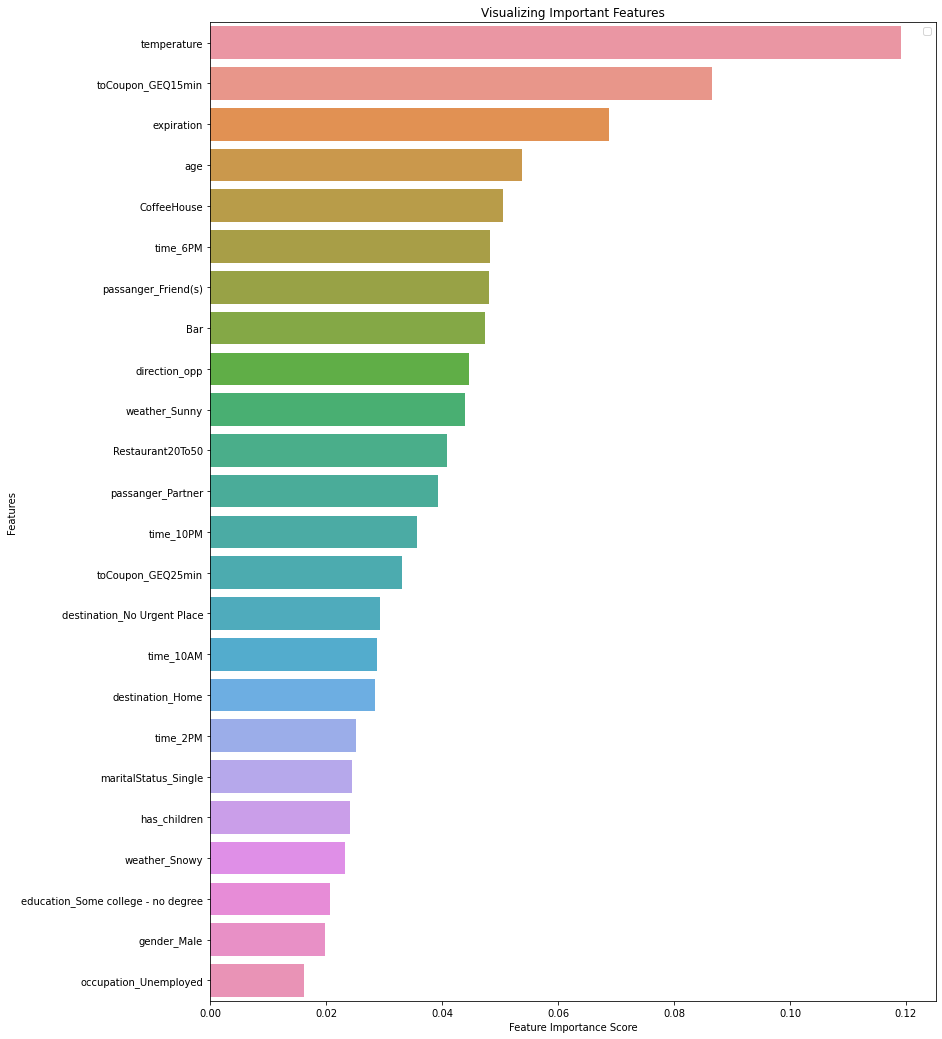

In [211]:
%matplotlib inline
# Creating a bar plot
fig, ax=plt.subplots(figsize = (13,18))
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Multinomial Logistic Regression Classifier

## GridSearch for Optimal Parameters

In [212]:
# Find best hyperparemeters using GridSearch

# Create list of parameters to optimize
mlr_param = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty':['none', 'l1', 'l2'], 'C': [10, 1, 0.1, 0.01] }

# Initialize GridSearch
# cv is number of folds in stratified k fold for multiclass or k fold for binary
# n_jobs -1 means to use all processors in parallel
# scoring = metric best parameters should improve
mlr_grid = GridSearchCV(estimator=LogisticRegression(random_state=100), param_grid=mlr_param, cv=3, n_jobs=-1, scoring='roc_auc_ovr_weighted') 

# Train GridSearch
mlr_grid.fit(feat_x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [10, 1, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc_ovr_weighted', ve

In [213]:
# Best Parameters to use
print(' Best Parameters:', '\t', mlr_grid.best_params_)

# Display best score
print('\n', 'Best Score:', '\t\t', mlr_grid.best_score_)

# All Parameters of classifier used
print('\n', 'Classifier:', '\t\t', mlr_grid.best_estimator_)

 Best Parameters: 	 {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

 Best Score: 		 0.705758734571305

 Classifier: 		 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=100, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


## Create multinomial logistic regression classifier

In [214]:
# Used for multiclass classificaiton problems
# Numerical inputs and categorical targets
# Using probability to determine the probability of a particular class vs the rest of the classes (multi class)

MLRclf = LogisticRegression(C= 1, multi_class='auto', solver='liblinear', penalty='l1')
MLRclf

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Using Stratified K Fold for Multinomial Logistic Regression

In [215]:
# Create empty list
MLRaccuracy, MLRprecs, MLRrecs, MLRf1ss, MLRmatcoef, MLRauc, MLRmodel_time = [], [], [], [], [], [], []

In [216]:
# Create variable for stratified K Fold
# k=10 fold
# Stratified K fold preserves the distribution of the values of the target attribute and prevents overfitting like cross validation
# Used for less bias than in train/split

# If only want to use stratified k fold ONCE
# MLRskf = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)

# If only want to use stratified k fold MULTIPLE TIMES
MLRskf = RepeatedStratifiedKFold(n_splits=10, random_state=None, n_repeats=3)

# Returns the number of splitting iterations in the cross validator
MLRskf.get_n_splits()

for train_index3, val_index3 in MLRskf.split(feat_x_train, y_train):
  
  MLRstart_time = time.process_time() # start counting time
  
  print("TRAIN:", train_index3, "VALIDATION:",val_index3)
  x3_train, x3_val = feat_x_train.iloc[train_index3], feat_x_train.iloc[val_index3]
  y3_train, y3_val = y_train.iloc[train_index3], y_train.iloc[val_index3]
  
  MLRclf.fit(x3_train, y3_train) # Train model on training set
  MLRprediction = MLRclf.predict(x3_val) # Test Model on training validation set
  MLRprediction_prob = MLRclf.predict_proba(x3_val) # probabilities for AUC score
  MLRscore = accuracy_score(y3_val, MLRprediction) # calculating accuracy between true labels vs classifier predicted labels
  MLRprec = precision_score(y3_val, MLRprediction, average='weighted') # calculating precision for unbalanced multiclass
  MLRrec = recall_score(y3_val, MLRprediction, average='weighted') # calculating recall for unbalanced multiclass
  MLRf1s = f1_score(y3_val, MLRprediction, average='weighted') # calculating recall for unbalanced multiclass
  MLRmat = matthews_corrcoef(y3_val, MLRprediction) # calculate matthews correlation coefficient +1 = perfect prediction
  MLRaucscore = roc_auc_score(y3_val, MLRprediction_prob, multi_class='ovr', average= 'weighted') # multiclass = ovr means one vs rest. Computes AUC score of each class against rest

  MLRend_time = time.process_time() # stop counting time
  
  MLRaccuracy.append(MLRscore)
  MLRprecs.append(MLRprec)
  MLRrecs.append(MLRrec)
  MLRf1ss.append(MLRf1s)
  MLRmatcoef.append(MLRmat)
  MLRauc.append(MLRaucscore)
  MLRmodel_time.append(MLRend_time - MLRstart_time)

print(f'Accuracy: {MLRaccuracy}')
print(f'Precision: {MLRprecs}')
print(f'Recall: {MLRrecs}')
print(f'F1 Score: {MLRf1ss}')
print(f'Matthews Correlation Coefficient: {MLRmatcoef}')
print(f'Area Under Curve: {MLRauc}')
print(f'Runtime: {MLRmodel_time}')

TRAIN: [   1    2    3 ... 8875 8876 8877] VALIDATION: [   0   51   59   67   77  100  101  102  111  130  147  152  166  167
  170  177  186  192  213  229  230  266  269  290  297  309  313  331
  334  335  344  345  377  414  417  421  438  442  454  462  489  495
  501  517  518  525  530  535  557  567  575  590  595  598  622  635
  658  667  673  675  680  683  686  693  705  733  785  813  814  826
  835  863  898  908  912  926  935  950  974  986 1042 1046 1047 1052
 1053 1073 1096 1097 1108 1112 1124 1130 1131 1139 1144 1149 1158 1162
 1168 1169 1173 1177 1182 1187 1208 1210 1244 1246 1249 1251 1270 1279
 1309 1321 1329 1332 1341 1347 1364 1365 1379 1416 1417 1457 1467 1472
 1482 1488 1490 1498 1506 1516 1530 1541 1550 1560 1588 1596 1617 1619
 1624 1629 1646 1649 1650 1660 1671 1677 1679 1684 1697 1698 1707 1726
 1727 1728 1730 1731 1754 1758 1768 1774 1795 1796 1817 1820 1827 1830
 1836 1847 1850 1852 1874 1880 1922 1930 1932 1941 1953 1962 1991 1993
 1996 2012 2026 2044 2

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN: [   0    1    2 ... 8875 8876 8877] VALIDATION: [  12   38   39   81   94  118  126  134  136  162  172  200  205  250
  255  262  273  283  295  299  314  325  327  343  386  393  402  410
  420  422  430  477  481  485  502  504  510  529  537  552  560  573
  602  605  615  623  627  628  633  637  645  653  654  655  679  692
  706  714  715  724  730  736  745  757  772  773  776  779  781  807
  811  827  828  842  858  868  869  870  873  875  880  883  886  893
  903  925  934  939  943  983  987  988  994 1072 1091 1114 1133 1161
 1190 1196 1202 1204 1209 1213 1215 1232 1241 1243 1261 1268 1285 1286
 1292 1296 1305 1312 1330 1345 1354 1356 1360 1361 1368 1372 1387 1388
 1414 1433 1441 1443 1453 1491 1501 1502 1515 1519 1534 1540 1552 1564
 1565 1582 1587 1589 1591 1634 1636 1637 1656 1658 1659 1691 1710 1715
 1733 1745 1765 1778 1803 1806 1826 1837 1843 1846 1855 1868 1869 1879
 1885 1891 1912 1923 1935 1938 1952 1959 1961 1964 1965 1969 1982 1989
 1990 2002 2005 2014 2

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN: [   0    1    2 ... 8875 8876 8877] VALIDATION: [  14   24   28   47   49   69   73   82   85   98  103  112  119  120
  121  124  131  159  168  184  185  211  219  224  231  239  240  252
  276  279  285  306  318  321  351  361  371  376  390  405  409  412
  413  418  419  440  444  446  449  453  472  473  479  486  488  493
  496  503  509  514  550  551  579  580  582  614  616  617  624  630
  640  642  644  648  652  656  659  678  698  704  719  735  756  759
  771  802  829  832  878  889  890  894  896  911  918  919  924  930
  932  945  948  964  967  977  981  992 1005 1023 1035 1037 1048 1051
 1066 1084 1100 1109 1123 1135 1137 1148 1150 1160 1163 1181 1184 1198
 1199 1211 1225 1267 1277 1289 1295 1310 1315 1320 1322 1323 1342 1344
 1348 1382 1399 1405 1410 1411 1429 1434 1444 1449 1450 1458 1462 1464
 1466 1468 1473 1475 1518 1525 1528 1548 1566 1594 1595 1602 1606 1611
 1614 1639 1662 1668 1669 1675 1676 1678 1685 1704 1705 1732 1735 1740
 1748 1759 1772 1779 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN: [   0    1    2 ... 8875 8876 8877] VALIDATION: [   3   13   17   25   37   46   52   57   60   96   97  108  125  129
  144  158  180  189  204  234  242  271  281  284  289  310  326  328
  347  356  387  408  427  432  441  443  455  457  459  464  497  542
  545  553  559  566  571  574  576  585  586  587  589  594  601  604
  608  611  629  641  662  669  674  682  687  700  712  716  722  725
  747  786  794  799  817  821  822  834  844  877  909  910  916  920
  931  962  965  968  975  976  989  990  996 1010 1011 1014 1026 1029
 1031 1041 1056 1061 1075 1077 1078 1080 1083 1094 1099 1101 1120 1125
 1140 1156 1176 1205 1223 1233 1253 1273 1291 1300 1313 1316 1319 1325
 1350 1353 1357 1363 1366 1367 1371 1373 1374 1381 1383 1385 1393 1396
 1415 1424 1452 1469 1471 1476 1489 1493 1512 1514 1517 1543 1544 1573
 1577 1578 1579 1580 1586 1601 1627 1635 1665 1686 1690 1700 1702 1711
 1713 1721 1723 1736 1747 1761 1773 1776 1793 1815 1829 1834 1835 1840
 1848 1854 1859 1860 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN: [   0    2    3 ... 8874 8875 8876] VALIDATION: [   1    7    9   22   31   33   34   38   57   78   89  115  118  119
  123  140  161  165  169  170  171  173  180  184  221  233  248  255
  256  258  260  273  283  290  295  298  300  301  303  308  315  329
  335  350  364  366  380  386  387  407  417  428  430  434  454  458
  461  462  463  483  486  488  499  520  543  553  572  582  585  597
  608  609  611  643  651  662  681  686  688  689  708  712  714  718
  730  731  737  738  752  776  777  785  788  802  823  833  839  848
  850  852  857  875  888  892  896  903  928  935  936  941  952  973
  982 1003 1008 1044 1053 1061 1076 1095 1107 1109 1115 1124 1128 1131
 1143 1153 1160 1189 1192 1194 1200 1204 1217 1257 1260 1262 1267 1271
 1290 1294 1340 1348 1350 1355 1360 1384 1389 1392 1393 1395 1406 1409
 1424 1426 1435 1456 1457 1461 1463 1466 1470 1486 1529 1538 1539 1565
 1567 1571 1591 1592 1608 1626 1628 1630 1645 1646 1672 1704 1715 1717
 1721 1722 1723 1759 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN: [   0    1    3 ... 8875 8876 8877] VALIDATION: [   2    4   51   52   65   71   77   82   88   97  109  114  116  124
  131  134  154  155  162  166  175  178  200  213  234  241  246  257
  259  277  278  288  291  310  327  333  351  355  359  362  374  376
  452  465  487  490  507  517  525  527  547  562  574  576  579  584
  592  604  606  607  613  625  629  648  656  675  683  699  701  706
  723  735  740  760  773  774  775  794  799  801  810  824  849  856
  864  870  871  873  874  877  884  894  898  902  925  933  943  951
  954  964  967  968  969  993  997  999 1012 1020 1022 1035 1042 1043
 1051 1060 1069 1070 1075 1090 1093 1102 1110 1113 1134 1138 1141 1152
 1164 1172 1178 1191 1197 1198 1265 1272 1275 1281 1286 1301 1302 1311
 1320 1325 1328 1333 1335 1338 1362 1366 1372 1377 1391 1396 1407 1420
 1423 1431 1432 1451 1458 1465 1469 1472 1485 1491 1498 1508 1518 1520
 1532 1541 1549 1563 1579 1593 1594 1596 1601 1611 1633 1640 1654 1661
 1668 1707 1730 1735 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN: [   0    1    2 ... 8875 8876 8877] VALIDATION: [   8   10   49   52   57   64   68   84   95  116  131  135  149  166
  167  176  182  192  194  203  218  230  236  242  246  254  267  274
  275  283  285  288  290  293  298  318  332  358  385  387  389  409
  431  434  443  484  486  507  539  547  560  568  572  602  624  641
  648  653  665  674  675  682  683  689  710  713  720  727  734  745
  753  773  809  811  829  831  867  877  879  882  885  890  908  913
  932  960  977 1005 1017 1033 1057 1066 1069 1070 1072 1078 1088 1099
 1105 1117 1148 1151 1185 1228 1236 1239 1244 1247 1252 1254 1270 1273
 1280 1287 1303 1305 1322 1331 1334 1336 1346 1350 1369 1386 1387 1406
 1407 1411 1423 1444 1455 1458 1475 1481 1484 1488 1498 1517 1534 1535
 1553 1563 1611 1618 1619 1629 1634 1641 1661 1667 1671 1682 1692 1708
 1713 1726 1730 1733 1752 1755 1759 1760 1788 1802 1813 1816 1819 1828
 1846 1870 1896 1897 1907 1942 1948 1955 1956 1964 1978 1984 1993 1996
 2012 2014 2022 2024 2

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN: [   0    2    3 ... 8875 8876 8877] VALIDATION: [   1    4   32   51   55   61   70   73  100  109  110  113  115  159
  168  173  180  191  193  195  217  223  225  241  244  245  263  284
  306  309  325  346  350  357  363  366  371  411  428  433  446  453
  454  455  461  466  467  489  504  513  521  522  532  537  538  561
  571  573  588  589  596  615  635  639  661  662  669  678  680  685
  692  697  699  721  722  723  728  733  750  755  765  784  796  834
  843  865  875  876  897  904  906  907  968  972  975  981  982  983
  997 1001 1002 1006 1015 1036 1037 1050 1074 1083 1094 1104 1130 1140
 1147 1155 1171 1177 1178 1183 1202 1203 1205 1209 1213 1216 1224 1245
 1249 1256 1259 1260 1267 1279 1295 1306 1314 1332 1338 1339 1362 1363
 1373 1375 1380 1381 1412 1417 1421 1426 1435 1438 1439 1443 1462 1469
 1479 1497 1506 1522 1524 1529 1533 1567 1569 1570 1579 1586 1594 1596
 1597 1609 1638 1652 1653 1659 1691 1693 1738 1739 1740 1745 1747 1761
 1780 1786 1807 1812 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN: [   0    1    2 ... 8875 8876 8877] VALIDATION: [   6   14   25   27   29   31   40   67   82   86   87   92  102  128
  142  147  151  152  154  188  189  210  231  234  238  249  257  265
  268  279  280  281  299  300  326  330  348  364  367  392  402  405
  423  429  462  463  468  472  491  497  499  508  520  540  541  550
  552  565  584  610  613  618  642  643  658  677  702  706  717  730
  763  767  768  778  787  791  793  794  797  807  818  822  827  828
  833  841  845  858  864  866  878  884  891  892  894  896  905  912
  916  919  931  942  963  985  990  998 1007 1013 1014 1018 1045 1055
 1075 1082 1085 1086 1100 1113 1126 1129 1153 1161 1166 1193 1195 1201
 1207 1220 1223 1232 1250 1265 1286 1309 1316 1328 1337 1352 1354 1378
 1385 1414 1425 1428 1447 1450 1452 1463 1468 1470 1473 1491 1515 1543
 1575 1614 1616 1627 1631 1645 1649 1650 1658 1664 1674 1678 1699 1704
 1706 1709 1711 1735 1748 1769 1776 1777 1789 1793 1794 1797 1798 1830
 1831 1850 1866 1899 1

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TRAIN: [   0    1    2 ... 8875 8876 8877] VALIDATION: [   5   56   63   76   97   98  117  122  127  129  132  134  136  162
  163  177  181  221  233  248  253  259  260  269  304  331  344  355
  390  404  417  419  420  437  447  487  488  502  516  517  555  592
  593  594  616  622  646  659  660  679  695  703  709  714  716  725
  737  743  746  764  766  769  770  776  777  782  803  805  816  830
  840  847  855  870  888  902  923  925  948  950  952  954  955  962
  987  988  995  999 1004 1011 1029 1032 1042 1096 1106 1107 1125 1139
 1141 1158 1172 1176 1180 1187 1196 1197 1204 1226 1242 1243 1248 1257
 1275 1276 1312 1319 1324 1330 1341 1344 1353 1355 1374 1382 1392 1400
 1416 1429 1446 1456 1490 1505 1508 1510 1518 1521 1527 1537 1538 1551
 1556 1561 1587 1589 1602 1613 1632 1647 1657 1662 1666 1669 1679 1683
 1705 1710 1715 1717 1722 1736 1749 1753 1763 1770 1809 1810 1817 1823
 1824 1833 1839 1845 1857 1858 1863 1880 1885 1887 1889 1894 1908 1911
 1915 1922 1937 2015 2

In [217]:
# Find the mean of the accuracies, precision, recall, F1 Score, Matthews Correlation Coefficient, and runtime
# Converted the list into an array
print(f'Accuracy Mean: {np.array(MLRaccuracy).mean()}')
print(f'Precision Mean: {np.array(MLRprecs).mean()}')
print(f'Recall Mean: {np.array(MLRrecs).mean()}')
print(f'F1 Score Mean: {np.array(MLRf1ss).mean()}')
print(f'Matthews Correlation Coefficienct Mean: {np.array(MLRmatcoef).mean()}')
print(f'Area Under Curve Mean: {np.array(MLRauc).mean()}')
print(f'Runtime Mean: {np.array(MLRmodel_time).mean()}')

Accuracy Mean: 0.45231662045359905
Precision Mean: 0.41274486633780644
Recall Mean: 0.45231662045359905
F1 Score Mean: 0.38142927558785467
Matthews Correlation Coefficienct Mean: 0.16307580483346126
Area Under Curve Mean: 0.7069209336512166
Runtime Mean: 0.7979952335333337


In [218]:
# Create variable for stratified K Fold
# k=10 fold
# Stratified K fold preserves the distribution of the values of the target attribute and prevents overfitting like cross validation
# Used for less bias than in train/split

# Create empty list
MLRaccuracy, MLRprecs, MLRrecs, MLRf1ss, MLRmatcoef, MLRauc, MLRmodel_time = [], [], [], [], [], [], []

# If only want to use stratified k fold ONCE
# MLRskf = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)

# If only want to use stratified k fold MULTIPLE TIMES
MLRskf = RepeatedStratifiedKFold(n_splits=10, random_state=None, n_repeats=3)

# Returns the number of splitting iterations in the cross validator
MLRskf.get_n_splits()

for train_index3, val_index3 in MLRskf.split(feat_x_train, y_train):
  
  MLRstart_time = time.process_time() # start counting time
  
  print("TRAIN:", train_index3, "VALIDATION:",val_index3)
  x3_train, x3_val = feat_x_train.iloc[train_index3], feat_x_train.iloc[val_index3]
  y3_train, y3_val = y_train.iloc[train_index3], y_train.iloc[val_index3]
  
  MLRclf.fit(x3_train, y3_train) # Train model on training set
  MLRprediction = MLRclf.predict(feat_x_test) # Test Model on TEST set
  MLRprediction_prob = MLRclf.predict_proba(feat_x_test) # probabilities for AUC score
  MLRscore = accuracy_score(y_test, MLRprediction) # calculating accuracy between true labels vs classifier predicted labels
  MLRprec = precision_score(y_test, MLRprediction, average='weighted') # calculating precision for unbalanced multiclass
  MLRrec = recall_score(y_test, MLRprediction, average='weighted') # calculating recall for unbalanced multiclass
  MLRf1s = f1_score(y_test, MLRprediction, average='weighted') # calculating recall for unbalanced multiclass
  MLRmat = matthews_corrcoef(y_test, MLRprediction) # calculate matthews correlation coefficient +1 = perfect prediction
  MLRaucscore = roc_auc_score(y_test, MLRprediction_prob, multi_class='ovr', average='weighted') # multiclass = ovr means one vs rest. Computes AUC score of each class against rest

  MLRend_time = time.process_time() # stop counting time
  
  MLRaccuracy.append(MLRscore)
  MLRprecs.append(MLRprec)
  MLRrecs.append(MLRrec)
  MLRf1ss.append(MLRf1s)
  MLRmatcoef.append(MLRmat)
  MLRauc.append(MLRaucscore)
  MLRmodel_time.append(MLRend_time - MLRstart_time)

print(f'Accuracy: {MLRaccuracy}')
print(f'Precision: {MLRprecs}')
print(f'Recall: {MLRrecs}')
print(f'F1 Score: {MLRf1ss}')
print(f'Matthews Correlation Coefficient: {MLRmatcoef}')
print(f'Area Under Curve: {MLRauc}')
print(f'Runtime: {MLRmodel_time}')

TRAIN: [   0    1    2 ... 8875 8876 8877] VALIDATION: [  11   19   20   27   33   34   42   45   48   49   50   60   68   96
  109  113  134  137  143  150  172  179  188  212  215  221  233  244
  247  250  262  274  285  289  290  295  307  313  326  327  329  345
  351  352  359  366  375  379  407  411  415  433  443  450  451  452
  453  458  460  468  472  477  487  497  503  505  517  543  550  559
  564  565  571  580  581  587  610  629  630  640  655  662  669  680
  697  703  714  715  724  752  759  789  803  805  810  820  824  829
  834  847  854  862  869  872  876  910  913  925  935  938  959  967
  975  978  983  985  990  999 1017 1028 1068 1097 1112 1145 1152 1168
 1170 1176 1193 1195 1213 1214 1216 1227 1229 1238 1254 1257 1291 1293
 1309 1319 1329 1343 1380 1394 1397 1411 1415 1418 1429 1431 1442 1445
 1466 1487 1493 1503 1505 1507 1518 1524 1532 1545 1546 1553 1558 1574
 1592 1595 1596 1608 1611 1619 1624 1649 1650 1676 1680 1683 1694 1764
 1771 1773 1776 1792 1

In [219]:
# Find the mean of the accuracies, precision, recall, F1 Score, Matthews Correlation Coefficient, and runtime
# Converted the list into an array
print(f'Accuracy Mean: {np.array(MLRaccuracy).mean()}')
print(f'Precision Mean: {np.array(MLRprecs).mean()}')
print(f'Recall Mean: {np.array(MLRrecs).mean()}')
print(f'F1 Score Mean: {np.array(MLRf1ss).mean()}')
print(f'Matthews Correlation Coefficienct Mean: {np.array(MLRmatcoef).mean()}')
print(f'Area Under Curve Mean: {np.array(MLRauc).mean()}')
print(f'Runtime Mean: {np.array(MLRmodel_time).mean()}')

Accuracy Mean: 0.4510896551724138
Precision Mean: 0.425440362819067
Recall Mean: 0.4510896551724138
F1 Score Mean: 0.3827316300256484
Matthews Correlation Coefficienct Mean: 0.1618886009363944
Area Under Curve Mean: 0.6983647617847643
Runtime Mean: 1.0513769243666664


## Analyze one Multinomial Logistic Regression Through Train/Split

In [220]:
# Train model using training sets
MLRclf.fit(feat_x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict on test set

In [221]:
# Predict on test set
MLRy_pred = MLRclf.predict(feat_x_test)

### Multinomial Logisitc Regression Confusion Matrix and Classification Report

In [222]:
# Confusion Matrix For Multi Class
from sklearn.metrics import multilabel_confusion_matrix

classlab = 'Bar', 'Not Accepted', 'Carry out & Take away', 'Coffee House', 'Restaurant(<20)', 'Restaurant(20-50)'

cfMLR=multilabel_confusion_matrix(y_test, MLRy_pred, labels = classlab)
print ("Confusion Matrix")
print(cfMLR)
# Matrix
# TN | FP
# --------
# FN | TP

Confusion Matrix
[[[3346   46]
  [ 214   19]]

 [[ 606 1457]
  [ 257 1305]]

 [[3011  109]
  [ 445   60]]

 [[2882  172]
  [ 477   94]]

 [[2853  205]
  [ 418  149]]

 [[3434    4]
  [ 182    5]]]


In [223]:
# feat_x_test_scaled = scaler.fit_transform(feat_x_test)

# MLRskf = RepeatedStratifiedKFold(n_splits=10, random_state=None, n_repeats=10)

# MLRclf.fit(feat_x_train,y_train)

# testpred = MLRclf.predict(feat_x_test)
# print (accuracy_score(y_test,testpred))

# multilabel_confusion_matrix(y_test, testpred, labels = classlab)

In [224]:
# Classification report
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, MLRy_pred)) 

                       precision    recall  f1-score   support

                  Bar       0.29      0.08      0.13       233
Carry out & Take away       0.36      0.12      0.18       505
         Coffee House       0.35      0.16      0.22       571
         Not Accepted       0.47      0.84      0.60      1562
    Restaurant(20-50)       0.56      0.03      0.05       187
      Restaurant(<20)       0.42      0.26      0.32       567

             accuracy                           0.45      3625
            macro avg       0.41      0.25      0.25      3625
         weighted avg       0.42      0.45      0.38      3625



### Matthew's Correlation Coefficient

In [225]:
print(matthews_corrcoef(y_test, MLRy_pred)) # calculate matthews correlation coefficient +1 = perfect prediction

0.16014998413716225


### ROC AUC (Area Under Receiver Operating Characteristic Curve)

In [226]:
# How good is the classifier a distinguishing between classes

# Determine probability of each class which is needed when using multiclass AUC scores
MLRy_pred_prob = MLRclf.predict_proba(feat_x_test)

# Deteremine roc auc score
# multi_class = 'ovr' means one vs rest. Computes AUC of each class against the rest
roc_auc_score(y_test, MLRy_pred_prob, multi_class='ovr', average='weighted')

0.6986680142461871

# THANK YOU